In [1]:
import pandas as pd              
import numpy as np               
import seaborn as sns            
import matplotlib.pyplot as plt  
from matplotlib import rcParams
import scipy

In [2]:
data=pd.read_csv("respirons-mieux-dans-le-20eme-donnees-mini-stations (1).csv", sep=';')

In [3]:
data.head()

index Date et heure de la mesure  Père Lachaise  Parc de Belleville  \
0     93  2019-01-04T21:00:00+01:00            NaN                 NaN   
1    114  2019-01-05T18:00:00+01:00            NaN                 NaN   
2    198  2019-01-09T06:00:00+01:00            NaN                 NaN   
3    206  2019-01-09T14:00:00+01:00            NaN                 NaN   
4    207  2019-01-09T15:00:00+01:00            NaN                 NaN   

   Bd Ménilmontant  Stade Louis Lumière  Rue Ménilmontant  Rue des Pyrénées  \
0              NaN                  NaN               NaN               NaN   
1              NaN                  NaN               NaN               NaN   
2              NaN                  NaN               NaN               NaN   
3              NaN                  NaN               NaN               NaN   
4              NaN                  NaN               NaN               NaN   

   Place St Fargeau  Echangeur A3/BP  Station Référence - BP Est  \
0               NaN              NaN                        32.1   
1               NaN              NaN                        27.1   
2               NaN              NaN                        31.3   
3               NaN              NaN                        48.4   
4               NaN              NaN                        51.6   

   Station Référence - Paris 18ème  
0                             48.2  
1                             54.9  
2                             36.8  
3                             40.0  
4                             41.2

In [4]:
del data["index"]

In [5]:
data.columns = ['date_et_heure_de_la_mesure','Pere_Lachaise','Parc_de_Belleville','Bd_Ménilmontant','Stade_Louis_Lumière','Rue_Ménilmontant','Rue_des_Pyrénées','Place_St_Fargeau','Echangeur_A3_BP','Station_Référence_BP_Est','Station_Référence_Paris_18ème']

In [6]:
data

date_et_heure_de_la_mesure  Pere_Lachaise  Parc_de_Belleville  \
0     2019-01-04T21:00:00+01:00            NaN                 NaN   
1     2019-01-05T18:00:00+01:00            NaN                 NaN   
2     2019-01-09T06:00:00+01:00            NaN                 NaN   
3     2019-01-09T14:00:00+01:00            NaN                 NaN   
4     2019-01-09T15:00:00+01:00            NaN                 NaN   
...                         ...            ...                 ...   
8755  2019-12-28T14:00:00+01:00      22.424410            7.362087   
8756  2019-12-29T11:00:00+01:00      17.678790           12.049500   
8757  2019-12-30T22:00:00+01:00      21.865040           40.163200   
8758  2019-12-31T08:00:00+01:00      10.037080            6.312667   
8759  2019-12-31T09:00:00+01:00       9.973921            7.647314   

      Bd_Ménilmontant  Stade_Louis_Lumière  Rue_Ménilmontant  \
0                 NaN                  NaN               NaN   
1                 NaN                  NaN               NaN   
2                 NaN                  NaN               NaN   
3                 NaN                  NaN               NaN   
4                 NaN                  NaN               NaN   
...               ...                  ...               ...   
8755         37.46641             45.97082          58.13051   
8756         31.47346             32.33243          35.87375   
8757         46.65905             35.39486          59.90918   
8758         26.14899             20.62105          41.24284   
8759         30.96449             24.39531          45.23020   

      Rue_des_Pyrénées  Place_St_Fargeau  Echangeur_A3_BP  \
0                  NaN               NaN              NaN   
1                  NaN               NaN              NaN   
2                  NaN               NaN              NaN   
3                  NaN               NaN              NaN   
4                  NaN               NaN              NaN   
...                ...               ...              ...   
8755          37.54344          38.64167         56.16296   
8756          36.98385          35.04940         46.80535   
8757          59.82568          50.17809         60.68566   
8758          33.42039          32.23238         47.83697   
8759          39.52792          34.77589         43.43020   

      Station_Référence_BP_Est  Station_Référence_Paris_18ème  
0                         32.1                           48.2  
1                         27.1                           54.9  
2                         31.3                           36.8  
3                         48.4                           40.0  
4                         51.6                           41.2  
...                        ...                            ...  
8755                      71.0                           31.7  
8756                      61.9                           30.5  
8757                     100.8                           67.0  
8758                      69.5                           35.9  
8759                      73.3                           37.8  

[8760 rows x 11 columns]

In [7]:
data.shape

(8760, 11)

In [8]:
# Data cleaning

In [9]:
data.duplicated().sum()  # Valeurs dupliquées
# Absence de valeurs dupliquées

0

In [10]:
### data=data.drop.duplicates()  # Enlever les valeurs dupliquées

In [11]:
data.isna().sum(axis=0)

date_et_heure_de_la_mesure          0
Pere_Lachaise                     933
Parc_de_Belleville               1806
Bd_Ménilmontant                  1343
Stade_Louis_Lumière               889
Rue_Ménilmontant                 1301
Rue_des_Pyrénées                  668
Place_St_Fargeau                 1308
Echangeur_A3_BP                   760
Station_Référence_BP_Est           60
Station_Référence_Paris_18ème     258
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


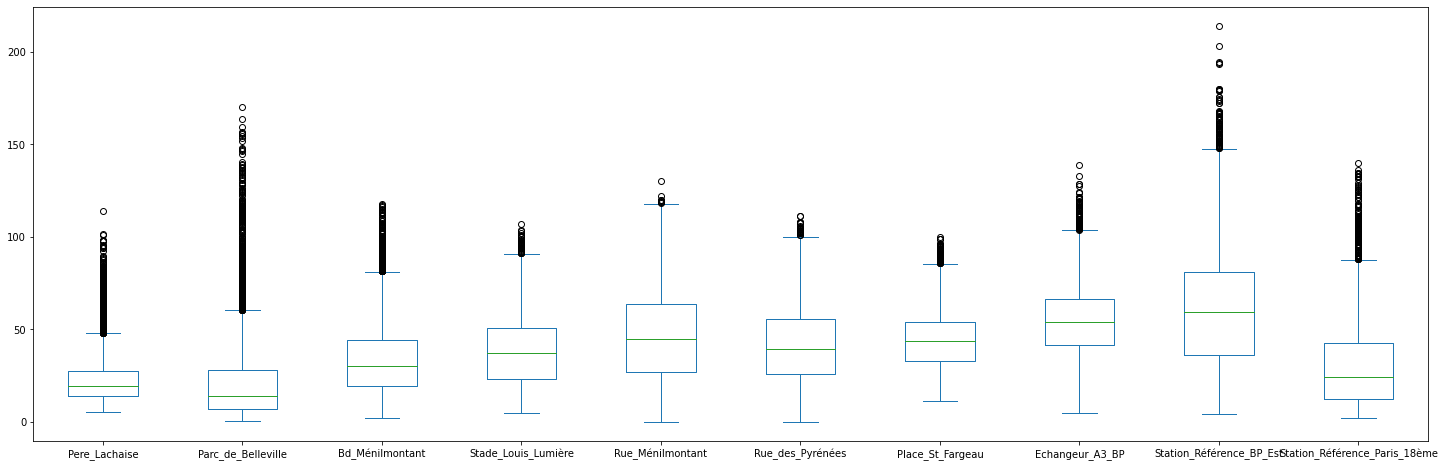

In [12]:
data.plot(kind="box", figsize=(25,8))

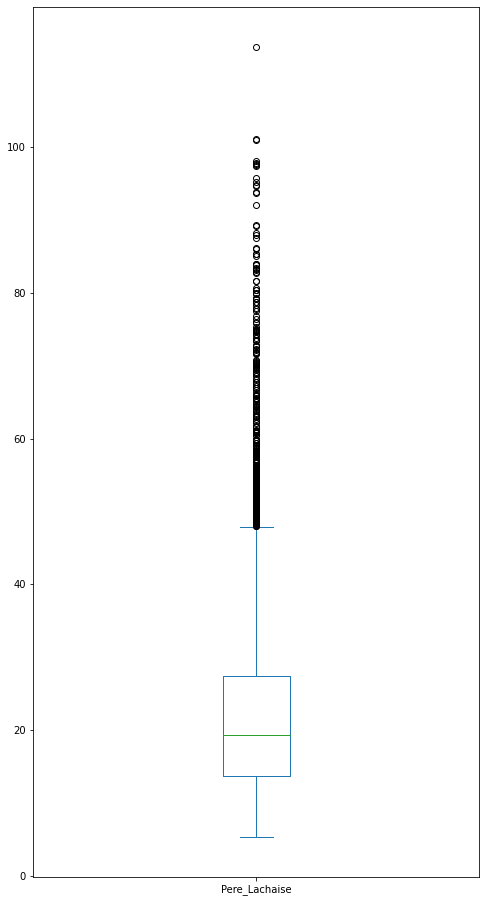

In [13]:
#Père_Lachaise:
fig, ax = plt.subplots(figsize=(8,16))
data.Pere_Lachaise.plot(kind='box')

In [14]:
q1=data.Pere_Lachaise.quantile(q=0.25)
q3=data.Pere_Lachaise.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

48.000635433225

In [15]:
outliers=(data["Pere_Lachaise"]>48).sum()

In [16]:
outliers/data.shape[0]*100
#4,36%

4.360730593607306

In [17]:
data.Pere_Lachaise.isna().sum()/data.shape[0]*100

10.65068493150685

In [18]:
# outliers < 5% , remplacement par moyenne
# ourliers > 5% , remplacment par mediane

In [19]:
mean = data.Pere_Lachaise.mean()
data.Pere_Lachaise.fillna(mean, inplace=True)

In [20]:
data.Pere_Lachaise.isna().sum()

0

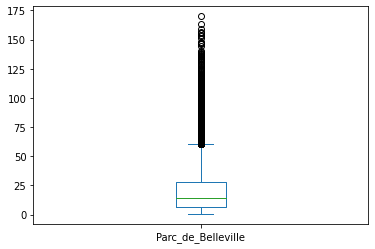

In [21]:
#Parc_de_Belleville:
data.Parc_de_Belleville.plot(kind='box')

In [22]:
q1=data.Parc_de_Belleville.quantile(q=0.25)
q3=data.Parc_de_Belleville.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

60.228068194755004

In [23]:
outliers=(data["Parc_de_Belleville"]>borne_sup).sum()
outliers

469

In [24]:
outliers/data.shape[0]*100 
# 5,35%

5.353881278538813

In [25]:
median = data.Parc_de_Belleville.median()
data.Parc_de_Belleville.fillna(median, inplace=True)

In [26]:
# Bd_Ménilmontant

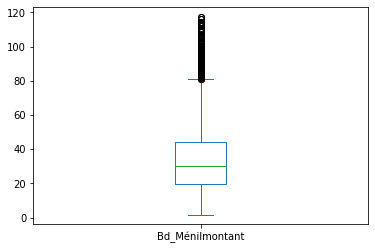

In [27]:
data.Bd_Ménilmontant.plot(kind='box')

In [28]:
q1=data.Bd_Ménilmontant.quantile(q=0.25)
q3=data.Bd_Ménilmontant.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

81.15540055825

In [29]:
outliers=(data["Bd_Ménilmontant"]>borne_sup).sum()

In [30]:
outliers/data.shape[0]*100 
# 2,73%

2.7283105022831053

In [31]:
mean = data.Bd_Ménilmontant.mean()
data.Bd_Ménilmontant.fillna(mean, inplace=True)

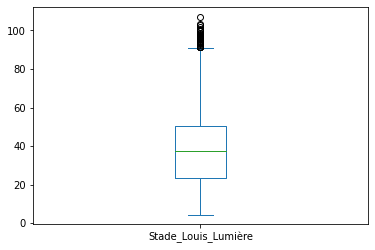

In [32]:
# Stade_Louis_Lumière
data.Stade_Louis_Lumière.plot(kind='box')

In [33]:
q1=data.Stade_Louis_Lumière.quantile(q=0.25)
q3=data.Stade_Louis_Lumière.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

91.1484440133

In [34]:
outliers=(data["Stade_Louis_Lumière"]>borne_sup).sum()
outliers/data.shape[0]*100

0.3995433789954338

In [35]:
mean = data.Stade_Louis_Lumière.mean()
data.Stade_Louis_Lumière.fillna(mean, inplace=True)

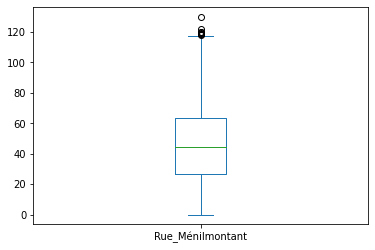

In [36]:
# Rue_Ménilmontant
data.Rue_Ménilmontant.plot(kind='box')

In [37]:
q1=data.Rue_Ménilmontant.quantile(q=0.25)
q3=data.Rue_Ménilmontant.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

118.21846179510001

In [38]:
outliers=(data["Rue_Ménilmontant"]>borne_sup).sum()
outliers/data.shape[0]*100

0.091324200913242

In [39]:
mean = data.Rue_Ménilmontant.mean()
data.Rue_Ménilmontant.fillna(mean, inplace=True)

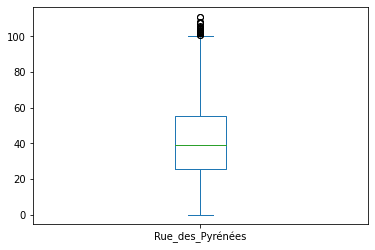

In [40]:
# Rue_des_Pyrénées
data.Rue_des_Pyrénées.plot(kind="box")

In [41]:
q1=data.Rue_des_Pyrénées.quantile(q=0.25)
q3=data.Rue_des_Pyrénées.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

100.3257709018

In [42]:
outliers=(data["Rue_des_Pyrénées"]>borne_sup).sum()
outliers/data.shape[0]*100

0.3424657534246575

In [43]:
mean = data.Rue_des_Pyrénées.mean()
data.Rue_des_Pyrénées.fillna(mean, inplace=True)

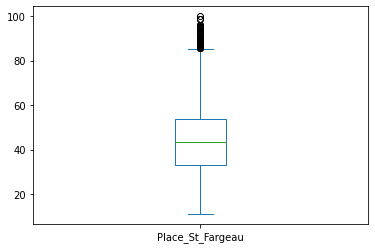

In [44]:
# Place_St_Fargeau
data.Place_St_Fargeau.plot(kind="box")

In [45]:
q1=data.Place_St_Fargeau.quantile(q=0.25)
q3=data.Place_St_Fargeau.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

85.4337659525

In [46]:
outliers=(data["Place_St_Fargeau"]>borne_sup).sum()
outliers/data.shape[0]*100
# 2,43%

0.7648401826484018

In [47]:
mean = data.Place_St_Fargeau.mean()
data.Place_St_Fargeau.fillna(mean, inplace=True)

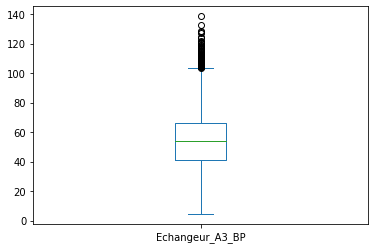

In [48]:
# Echangeur_A3_BP
data.Echangeur_A3_BP.plot(kind='box')

In [49]:
q1=data.Echangeur_A3_BP.quantile(q=0.25)
q3=data.Echangeur_A3_BP.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

103.6194916962625

In [50]:
outliers=(data["Echangeur_A3_BP"]>borne_sup).sum()
outliers/data.shape[0]*100
# 2%

1.0273972602739725

In [51]:
mean = data.Echangeur_A3_BP.mean()
data.Echangeur_A3_BP.fillna(mean, inplace=True)

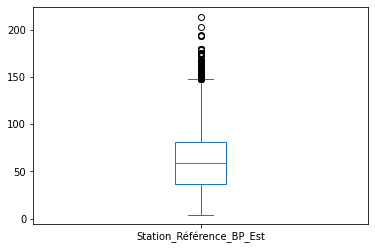

In [52]:
# Station_Référence_BP_Est 
data.Station_Référence_BP_Est.plot(kind='box')

In [53]:
q1=data.Station_Référence_BP_Est.quantile(q=0.25)
q3=data.Station_Référence_BP_Est.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

147.8

In [54]:
outliers=(data["Station_Référence_BP_Est"]>borne_sup).sum()
outliers/data.shape[0]*100
# 0,96%

0.9360730593607305

In [55]:
mean = data.Station_Référence_BP_Est.mean()
data.Station_Référence_BP_Est.fillna(mean, inplace=True)

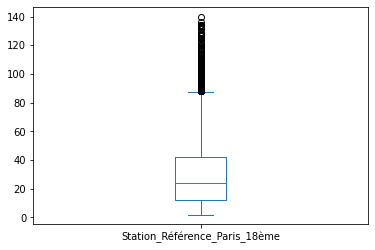

In [56]:
# Station_Référence_Paris_18ème
data.Station_Référence_Paris_18ème.plot(kind='box')

In [57]:
q1=data.Station_Référence_Paris_18ème.quantile(q=0.25)
q3=data.Station_Référence_Paris_18ème.quantile(q=0.75)
IQR=q3-q1
borne_sup=q3+1.5*IQR
borne_sup

87.75

In [58]:
outliers=(data["Station_Référence_Paris_18ème"]>borne_sup).sum()
outliers/data.shape[0]*100
# 2,27%

1.9634703196347032

In [59]:
mean = data.Station_Référence_Paris_18ème.mean()
data.Station_Référence_Paris_18ème.fillna(mean, inplace=True)

In [60]:
data.isna().sum()

date_et_heure_de_la_mesure       0
Pere_Lachaise                    0
Parc_de_Belleville               0
Bd_Ménilmontant                  0
Stade_Louis_Lumière              0
Rue_Ménilmontant                 0
Rue_des_Pyrénées                 0
Place_St_Fargeau                 0
Echangeur_A3_BP                  0
Station_Référence_BP_Est         0
Station_Référence_Paris_18ème    0
dtype: int64

In [61]:
data.describe()

Pere_Lachaise  Parc_de_Belleville  Bd_Ménilmontant  \
count    8760.000000         8760.000000      8760.000000   
mean       22.484498           19.969951        34.148261   
std        12.121777           20.433233        18.206757   
min         5.277120            0.484373         1.801964   
25%        14.348507            8.135876        21.274928   
50%        20.870351           13.925615        34.148261   
75%        26.141510           23.261058        40.856889   
max       113.782096          169.957657       117.436565   

       Stade_Louis_Lumière  Rue_Ménilmontant  Rue_des_Pyrénées  \
count          8760.000000       8760.000000       8760.000000   
mean             38.560642         46.407882         41.686898   
std              17.021287         21.872280         20.167455   
min               4.515505          0.025318          0.054235   
25%              24.839267         29.877743         26.745490   
50%              38.560642         46.407882         41.622235   
75%              48.842551         59.869318         53.830406   
max             107.071200        130.014038        110.967340   

       Place_St_Fargeau  Echangeur_A3_BP  Station_Référence_BP_Est  \
count       8760.000000      8760.000000               8760.000000   
mean          44.150209        54.128323                 60.645586   
std           14.239261        18.565444                 31.626935   
min           11.026864         4.439950                  4.400000   
25%           35.058683        42.457495                 36.400000   
50%           44.150209        54.128323                 59.600000   
75%           51.724130        64.680956                 80.700000   
max           99.980426       138.491991                213.700000   

       Station_Référence_Paris_18ème  
count                    8760.000000  
mean                       29.860503  
std                        21.613054  
min                         2.000000  
25%                        12.300000  
50%                        25.100000  
75%                        41.525000  
max                       139.800000

In [62]:
# A titre indicatif, les seuils réglementaires de NO2 sont de 40 µg/m3 pour l'exposition chronique 
# et de 200 µg/m3 pour une exposition plus inhabituelle.

In [63]:
data.head()

date_et_heure_de_la_mesure  Pere_Lachaise  Parc_de_Belleville  \
0  2019-01-04T21:00:00+01:00      22.484498           13.925615   
1  2019-01-05T18:00:00+01:00      22.484498           13.925615   
2  2019-01-09T06:00:00+01:00      22.484498           13.925615   
3  2019-01-09T14:00:00+01:00      22.484498           13.925615   
4  2019-01-09T15:00:00+01:00      22.484498           13.925615   

   Bd_Ménilmontant  Stade_Louis_Lumière  Rue_Ménilmontant  Rue_des_Pyrénées  \
0        34.148261            38.560642         46.407882         41.686898   
1        34.148261            38.560642         46.407882         41.686898   
2        34.148261            38.560642         46.407882         41.686898   
3        34.148261            38.560642         46.407882         41.686898   
4        34.148261            38.560642         46.407882         41.686898   

   Place_St_Fargeau  Echangeur_A3_BP  Station_Référence_BP_Est  \
0         44.150209        54.128323                      32.1   
1         44.150209        54.128323                      27.1   
2         44.150209        54.128323                      31.3   
3         44.150209        54.128323                      48.4   
4         44.150209        54.128323                      51.6   

   Station_Référence_Paris_18ème  
0                           48.2  
1                           54.9  
2                           36.8  
3                           40.0  
4                           41.2

In [64]:
data["date"]= pd.to_datetime(data["date_et_heure_de_la_mesure"], format="%Y-%m")

In [65]:
data.head()

date_et_heure_de_la_mesure  Pere_Lachaise  Parc_de_Belleville  \
0  2019-01-04T21:00:00+01:00      22.484498           13.925615   
1  2019-01-05T18:00:00+01:00      22.484498           13.925615   
2  2019-01-09T06:00:00+01:00      22.484498           13.925615   
3  2019-01-09T14:00:00+01:00      22.484498           13.925615   
4  2019-01-09T15:00:00+01:00      22.484498           13.925615   

   Bd_Ménilmontant  Stade_Louis_Lumière  Rue_Ménilmontant  Rue_des_Pyrénées  \
0        34.148261            38.560642         46.407882         41.686898   
1        34.148261            38.560642         46.407882         41.686898   
2        34.148261            38.560642         46.407882         41.686898   
3        34.148261            38.560642         46.407882         41.686898   
4        34.148261            38.560642         46.407882         41.686898   

   Place_St_Fargeau  Echangeur_A3_BP  Station_Référence_BP_Est  \
0         44.150209        54.128323                      32.1   
1         44.150209        54.128323                      27.1   
2         44.150209        54.128323                      31.3   
3         44.150209        54.128323                      48.4   
4         44.150209        54.128323                      51.6   

   Station_Référence_Paris_18ème                       date  
0                           48.2  2019-01-04 21:00:00+01:00  
1                           54.9  2019-01-05 18:00:00+01:00  
2                           36.8  2019-01-09 06:00:00+01:00  
3                           40.0  2019-01-09 14:00:00+01:00  
4                           41.2  2019-01-09 15:00:00+01:00

In [66]:
df=data.set_index("date")

In [67]:
del df["date_et_heure_de_la_mesure"]

In [68]:
df.head()

Pere_Lachaise  Parc_de_Belleville  Bd_Ménilmontant  \
date                                                                            
2019-01-04 21:00:00+01:00      22.484498           13.925615        34.148261   
2019-01-05 18:00:00+01:00      22.484498           13.925615        34.148261   
2019-01-09 06:00:00+01:00      22.484498           13.925615        34.148261   
2019-01-09 14:00:00+01:00      22.484498           13.925615        34.148261   
2019-01-09 15:00:00+01:00      22.484498           13.925615        34.148261   

                           Stade_Louis_Lumière  Rue_Ménilmontant  \
date                                                               
2019-01-04 21:00:00+01:00            38.560642         46.407882   
2019-01-05 18:00:00+01:00            38.560642         46.407882   
2019-01-09 06:00:00+01:00            38.560642         46.407882   
2019-01-09 14:00:00+01:00            38.560642         46.407882   
2019-01-09 15:00:00+01:00            38.560642         46.407882   

                           Rue_des_Pyrénées  Place_St_Fargeau  \
date                                                            
2019-01-04 21:00:00+01:00         41.686898         44.150209   
2019-01-05 18:00:00+01:00         41.686898         44.150209   
2019-01-09 06:00:00+01:00         41.686898         44.150209   
2019-01-09 14:00:00+01:00         41.686898         44.150209   
2019-01-09 15:00:00+01:00         41.686898         44.150209   

                           Echangeur_A3_BP  Station_Référence_BP_Est  \
date                                                                   
2019-01-04 21:00:00+01:00        54.128323                      32.1   
2019-01-05 18:00:00+01:00        54.128323                      27.1   
2019-01-09 06:00:00+01:00        54.128323                      31.3   
2019-01-09 14:00:00+01:00        54.128323                      48.4   
2019-01-09 15:00:00+01:00        54.128323                      51.6   

                           Station_Référence_Paris_18ème  
date                                                      
2019-01-04 21:00:00+01:00                           48.2  
2019-01-05 18:00:00+01:00                           54.9  
2019-01-09 06:00:00+01:00                           36.8  
2019-01-09 14:00:00+01:00                           40.0  
2019-01-09 15:00:00+01:00                           41.2

In [69]:
# Père Lachaise

In [70]:
data.Pere_Lachaise.describe()
# La moyenne des relevés est de 22,48 et donc inférieure à 40 µg/m3.
# L'écart type est de 12,12
# La valeur minimale est de 5,28
# 25% des relevés sont inférieurs ou égales à 14,35 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou egales à 20,87 < à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 26,14 < à 40 µg/m3.
# La valeur maximale est de 113,78 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       22.484498
std        12.121777
min         5.277120
25%        14.348507
50%        20.870351
75%        26.141510
max       113.782096
Name: Pere_Lachaise, dtype: float64

In [71]:
taux_de_dispersion=data.Pere_Lachaise.std()/data.Pere_Lachaise.mean()*100     
taux_de_dispersion
# Les valeurs du Père Lachaise sont dispersées à 53%.

53.91170652416986

In [72]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Pere_Lachaise'] >= 40
data40.sum()
# 701 valeurs sont au dessus de 40 µg/m3

701

In [73]:
data40.sum()/data.shape[0]*100
# 8% des valeurs > 40 µg/m3

8.002283105022832

In [74]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Pere_Lachaise'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [75]:
# Test de shapiro:
scipy.stats.shapiro(data.Pere_Lachaise) 
# La P-value de 0 est inférieure à 5% donc les valeurs du Père Lachaise ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8461052179336548, 0.0)

In [76]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Pere_Lachaise,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs du Père Lachaise ne suivent pas la loi normale.

KstestResult(statistic=0.9999999343850217, pvalue=0.0)

In [77]:
data.Pere_Lachaise.skew()
# La courbe du Père Lachaise est asymétrique vers la droite

1.9759978716526272

In [78]:
data.Pere_Lachaise.kurtosis()
# 6 > 3 donc la courbe du Père Lachaise est leptokurtic

6.1751997140175385

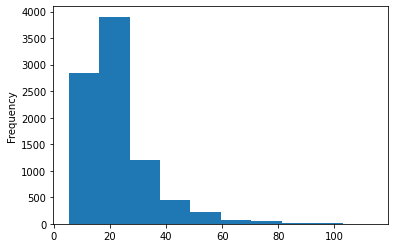

In [79]:
data.Pere_Lachaise.plot(kind="hist")

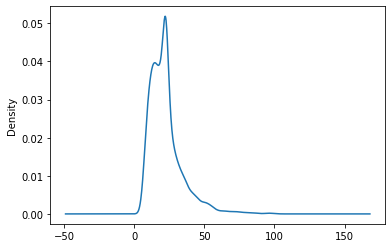

In [80]:
data.Pere_Lachaise.plot(kind="density")

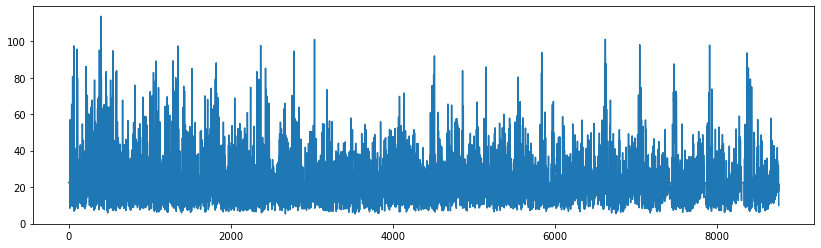

In [81]:
# Série temporelle
data.Pere_Lachaise.plot(y="Pere_Lachaise", figsize=(14,4))

Text(0.5, 1.0, 'Pere_Lachaise')

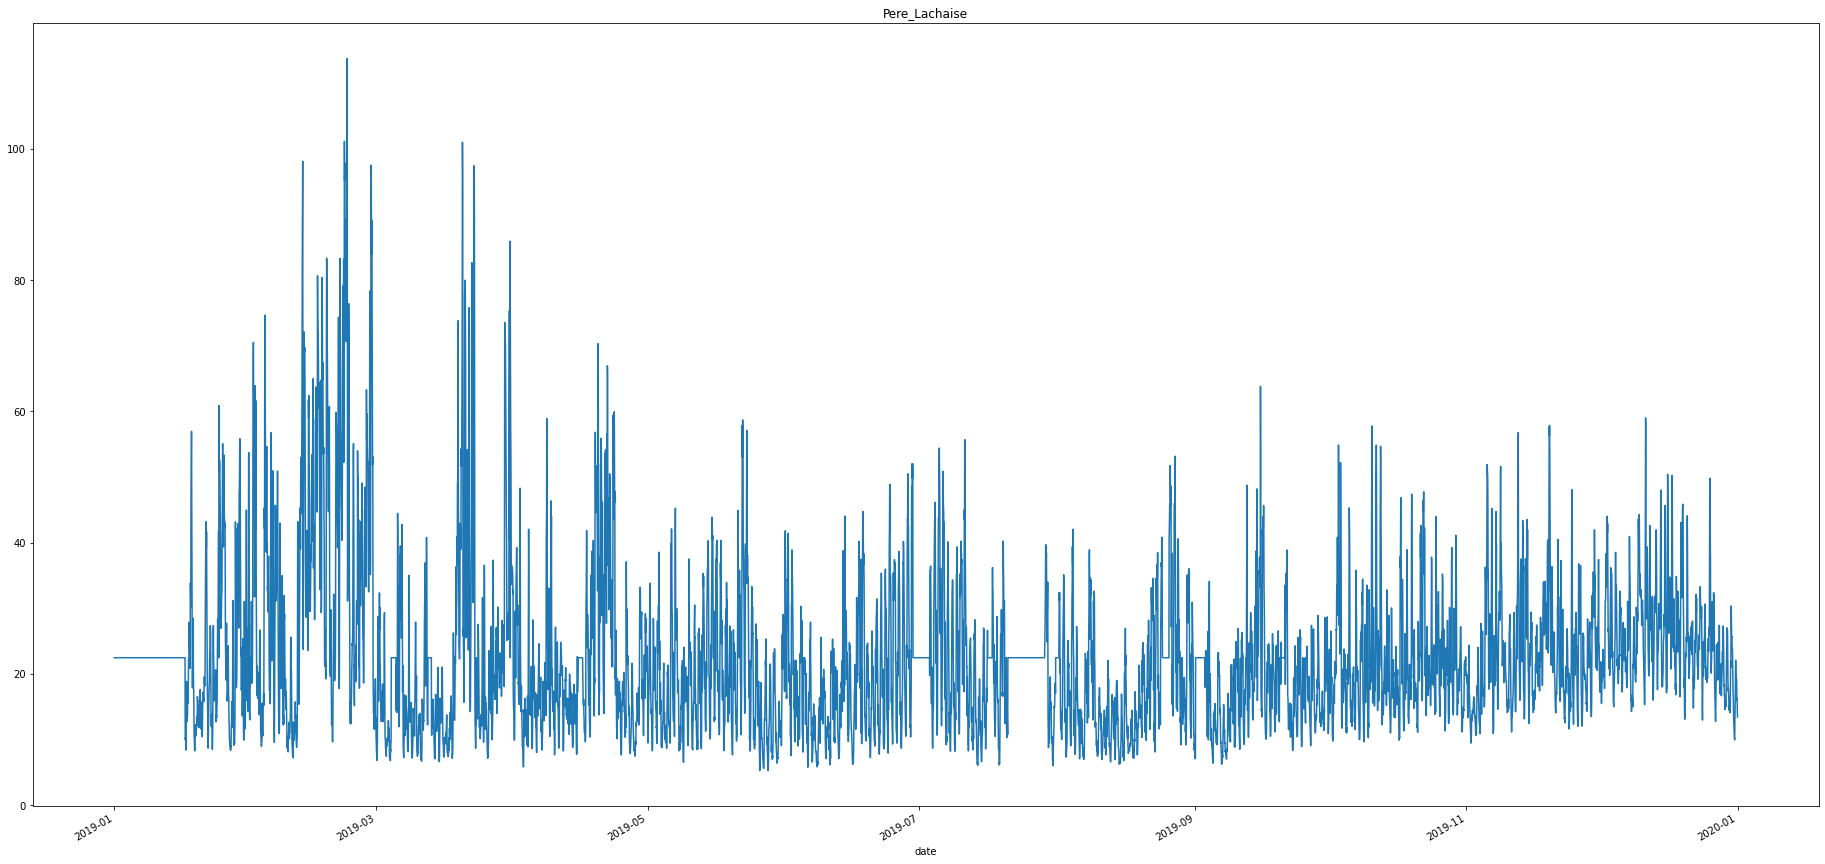

In [82]:
fig, ax = plt.subplots(figsize=(32,16))
df["Pere_Lachaise"].plot()
plt.title("Pere_Lachaise")

In [83]:
# Parc de Belleville

In [84]:
data.Parc_de_Belleville.describe()
# La moyenne des relevés est de 19,97 et donc inférieure à 40 µg/m3.
# L'écart type est de 20,43
# La valeur minimale est de 0,48
# 25% des relevés sont inférieurs ou égales à 8,14 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou egales à 13,93 < à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 23,26 < à 40 µg/m3.
# La valeur maximale est de 169,96 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       19.969951
std        20.433233
min         0.484373
25%         8.135876
50%        13.925615
75%        23.261058
max       169.957657
Name: Parc_de_Belleville, dtype: float64

In [85]:
taux_de_dispersion=data.Parc_de_Belleville.std()/data.Parc_de_Belleville.mean()*100     
taux_de_dispersion
# Les valeurs du Parc de Belleville sont dispersées à 102,32%.

102.319894787296

In [86]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Parc_de_Belleville'] >= 40
data40.sum()
# 1006 valeurs sont au dessus de 40 µg/m3

1006

In [87]:
data40.sum()/data.shape[0]*100
# 11,48% des valeurs > 40 µg/m3

11.484018264840183

In [88]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Parc_de_Belleville'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [89]:
# Test de shapiro:
scipy.stats.shapiro(data.Parc_de_Belleville) 
# La P-value de 0 est inférieure à 5% donc les valeurs du Parc de Belleville ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.715903639793396, 0.0)

In [90]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Parc_de_Belleville,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs du Parc de Belleville ne suivent pas la loi normale.

KstestResult(statistic=0.943658653572912, pvalue=0.0)

In [91]:
data.Parc_de_Belleville.skew()
# La courbe du Parc de Belleville est asymétrique vers la droite

2.6715472662103332

In [92]:
data.Parc_de_Belleville.kurtosis()
# La courbe du Parc de Belleville est leptokurtic

9.128973900466647

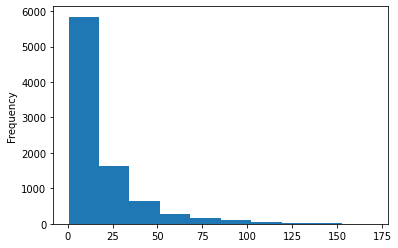

In [93]:
data.Parc_de_Belleville.plot(kind="hist")

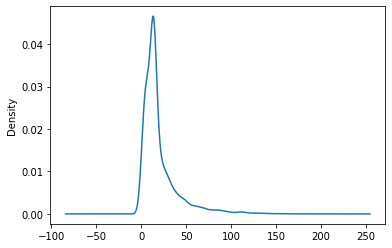

In [94]:
data.Parc_de_Belleville.plot(kind="density")

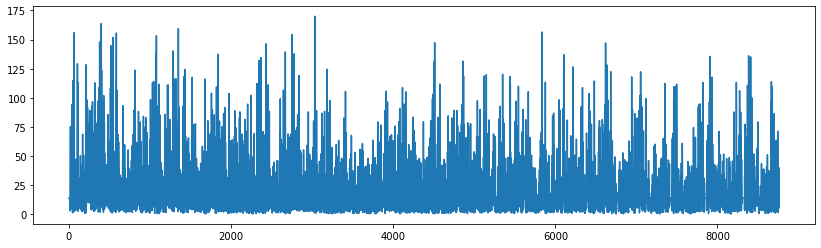

In [95]:
# Série temporelle
data.Parc_de_Belleville.plot(y="Parc_de_Belleville", figsize=(14,4))

Text(0.5, 1.0, 'Parc_de_Belleville')

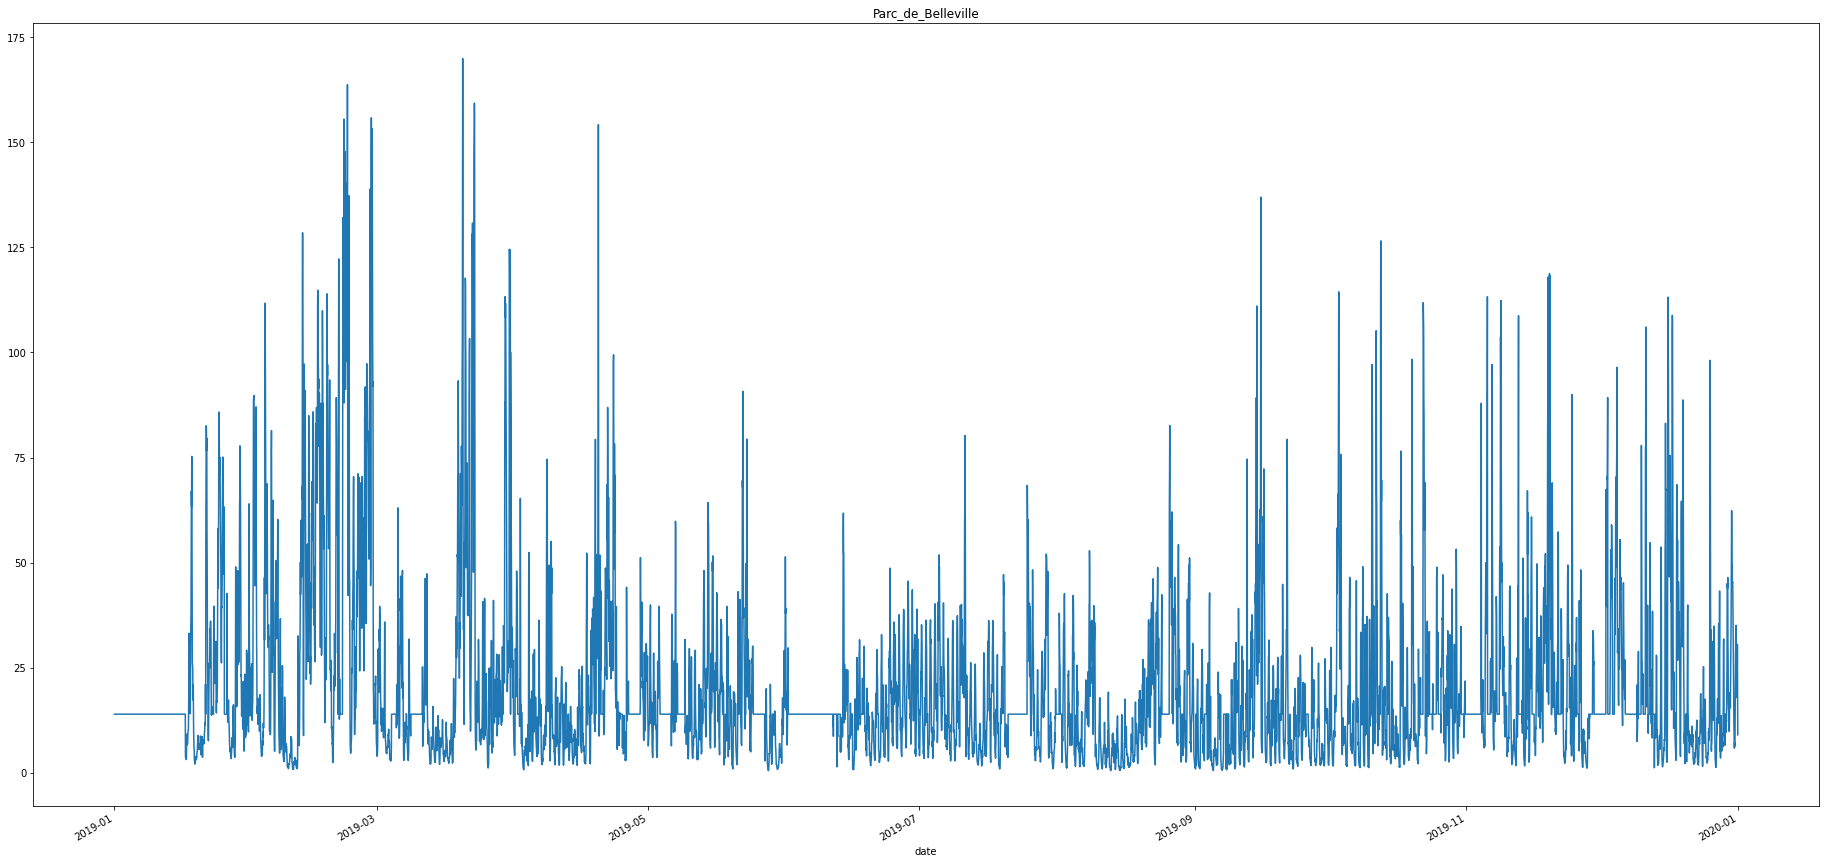

In [96]:
fig, ax = plt.subplots(figsize=(32,16))
df["Parc_de_Belleville"].plot()
plt.title("Parc_de_Belleville")

In [97]:
# Boulevard Ménilmontant

In [98]:
data.Bd_Ménilmontant.describe()
# La moyenne des relevés est de 34,15 et donc inférieure à 40 µg/m3.
# L'écart type est de 18,2
# La valeur minimale est de 1,8
# 25% des relevés sont inférieurs ou égales à 21,27 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou egales à 34,14 < à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 40,86 = à 40 µg/m3.
# La valeur maximale est de 117,43 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       34.148261
std        18.206757
min         1.801964
25%        21.274928
50%        34.148261
75%        40.856889
max       117.436565
Name: Bd_Ménilmontant, dtype: float64

In [99]:
taux_de_dispersion=data.Bd_Ménilmontant.std()/data.Bd_Ménilmontant.mean()*100     
taux_de_dispersion
# Les valeurs du Boulevard Ménilmontant sont dispersées à 53,32%.

53.316789706384895

In [100]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Bd_Ménilmontant'] >= 40
data40.sum()
# 2287 valeurs sont au dessus de 40 µg/m3

2287

In [101]:
data40.sum()/data.shape[0]*100
# 26,11% des valeurs > 40 µg/m3

26.10730593607306

In [102]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Bd_Ménilmontant'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [103]:
# Test de shapiro:
scipy.stats.shapiro(data.Bd_Ménilmontant) 
# La P-value de 0 est inférieure à 5% donc les valeurs du Boulevard Ménilmontant ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9156888127326965, 0.0)

In [104]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Bd_Ménilmontant,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs du Parc de Belleville ne suivent pas la loi normale.

KstestResult(statistic=0.9987895563164825, pvalue=0.0)

In [105]:
data.Bd_Ménilmontant.skew()
# La courbe du Boulevard Ménilmontant est asymétrique vers la droite

1.2220389472604305

In [106]:
data.Bd_Ménilmontant.kurtosis()
# La courbe du Boulevard Ménilmontant est platycurtic

1.9954751634899734

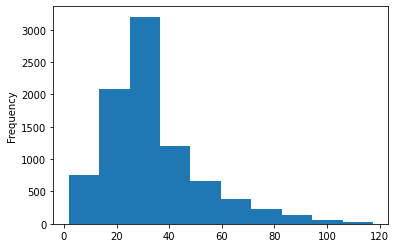

In [107]:
data.Bd_Ménilmontant.plot(kind="hist")

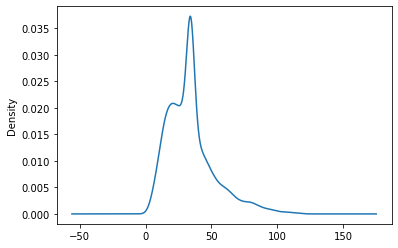

In [108]:
data.Bd_Ménilmontant.plot(kind="density")

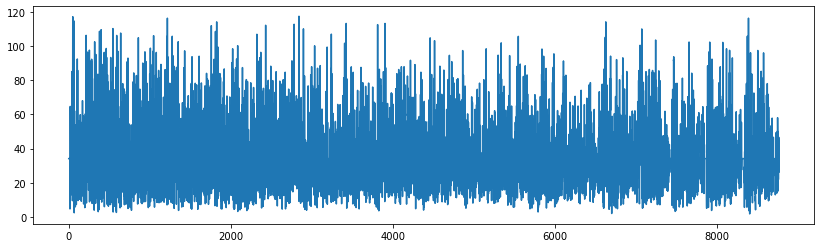

In [109]:
# Série temporelle
data.Bd_Ménilmontant.plot(y="Bd_Ménilmontant", figsize=(14,4))

Text(0.5, 1.0, 'Bd_Ménilmontant')

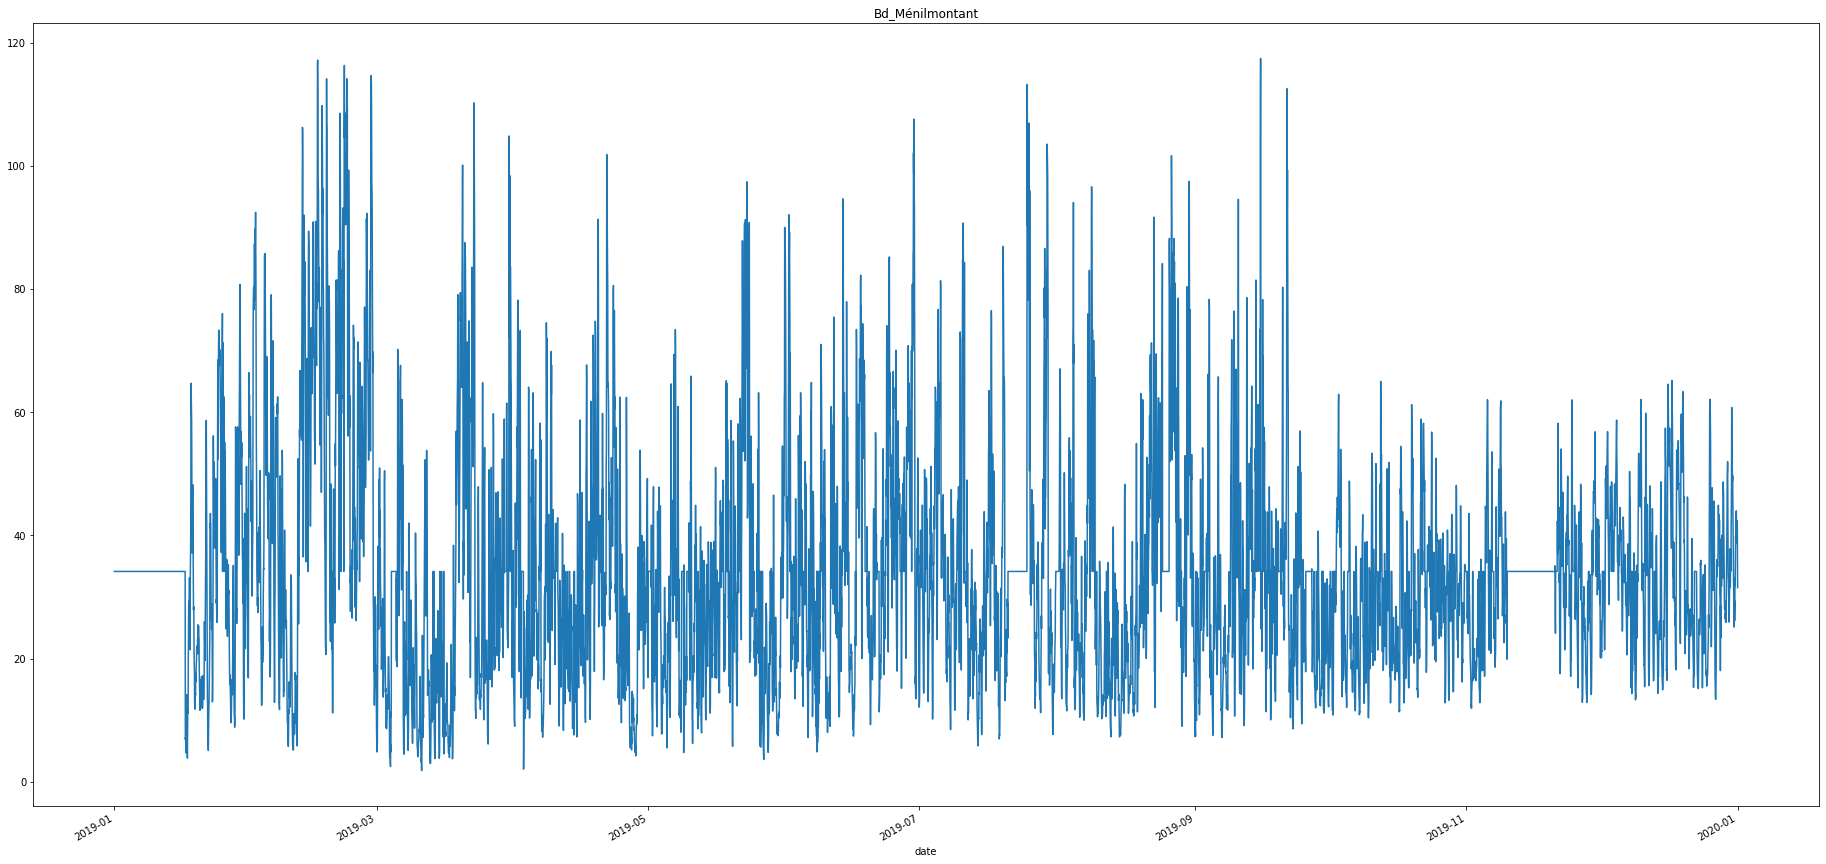

In [110]:
fig, ax = plt.subplots(figsize=(32,16))
df["Bd_Ménilmontant"].plot()
plt.title("Bd_Ménilmontant")

In [111]:
# Stade Louis Lumière

In [112]:
data.Stade_Louis_Lumière.describe()
# La moyenne des relevés est de 38,56 et donc inférieure à 40 µg/m3.
# L'écart type est de 17,02.
# La valeur minimale est de 4,52.
# 25% des relevés sont inférieurs ou égales à 24,84 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou egales à 38,56 < à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 48,84 > à 40 µg/m3.
# La valeur maximale est de 107,07 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       38.560642
std        17.021287
min         4.515505
25%        24.839267
50%        38.560642
75%        48.842551
max       107.071200
Name: Stade_Louis_Lumière, dtype: float64

In [113]:
taux_de_dispersion=data.Stade_Louis_Lumière.std()/data.Stade_Louis_Lumière.mean()*100     
taux_de_dispersion
# Les valeurs du stade Louis Lumière sont dispersées à 44,14%.

44.14160780426843

In [114]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Stade_Louis_Lumière'] >= 40
data40.sum()
# 3543 valeurs sont au dessus de 40 µg/m3

3543

In [115]:
data40.sum()/data.shape[0]*100
# 40,44% des valeurs > 40 µg/m3

40.445205479452056

In [116]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Stade_Louis_Lumière'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [117]:
# Test de shapiro:
scipy.stats.shapiro(data.Stade_Louis_Lumière) 
# La P-value de 1,97e-39 est inférieure à 5% donc les valeurs du du stade Louis Lumière ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9695712327957153, 1.974178703808553e-39)

In [118]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Stade_Louis_Lumière,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs du Stade Louis Lumière ne suivent pas la loi normale.

KstestResult(statistic=0.9999968416919909, pvalue=0.0)

In [119]:
data.Stade_Louis_Lumière.skew()
# La courbe du Stade Louis Lumière est asymétrique vers la droite

0.5699897681919401

In [120]:
data.Stade_Louis_Lumière.kurtosis()
# La courbe du stade Louis Lumière est platykurtic

0.12686415660101513

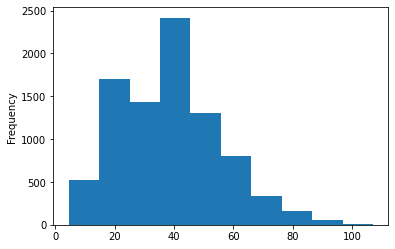

In [121]:
data.Stade_Louis_Lumière.plot(kind="hist")

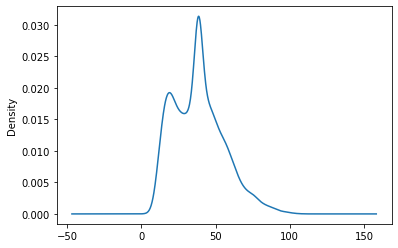

In [122]:
data.Stade_Louis_Lumière.plot(kind="density")

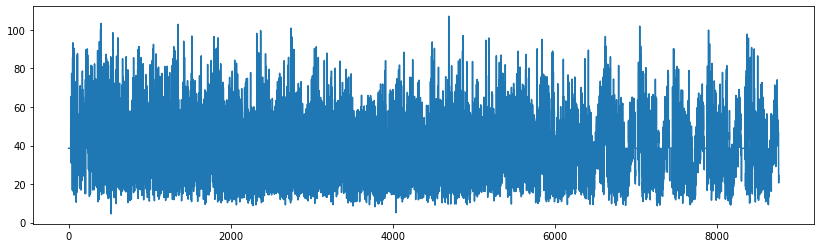

In [123]:
# Série temporelle
data.Stade_Louis_Lumière.plot(y="Stade_Louis_Lumière", figsize=(14,4))

Text(0.5, 1.0, 'Stade_Louis_Lumière')

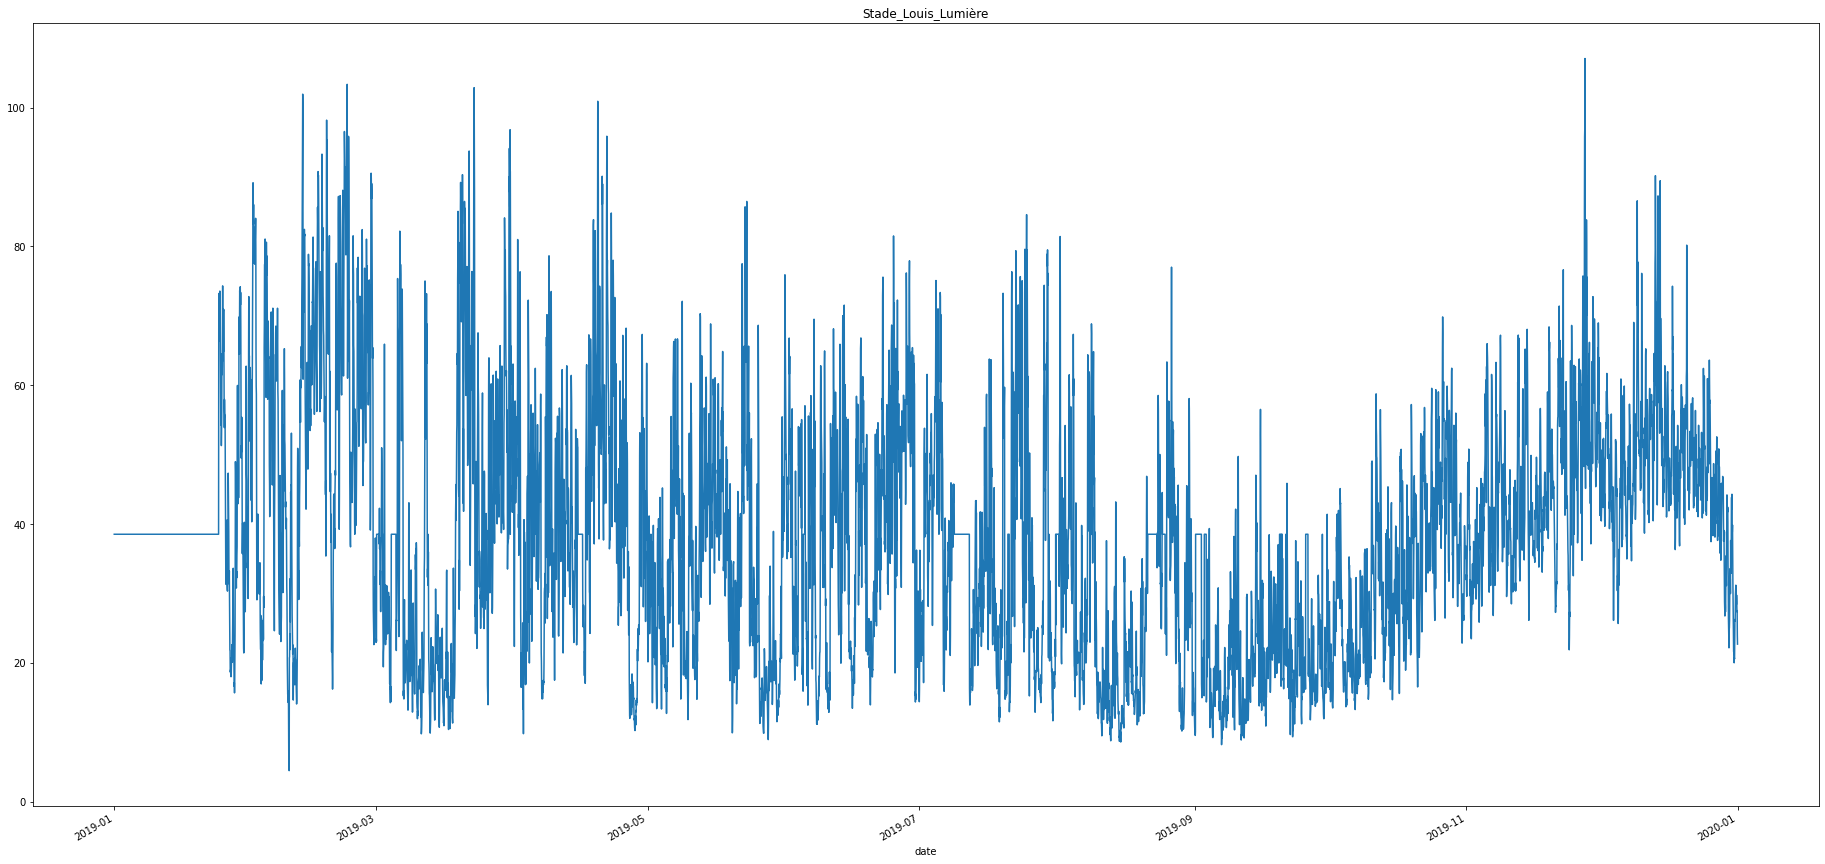

In [124]:
fig, ax = plt.subplots(figsize=(32,16))
df["Stade_Louis_Lumière"].plot()
plt.title("Stade_Louis_Lumière")

In [125]:
# Rue Ménilmontant

In [126]:
data.Rue_Ménilmontant.describe()
# La moyenne des relevés est de 46,41 et donc supérieur à 40 µg/m3.
# L'écart type est de 21,87.
# La valeur minimale est de 0,03.
# 25% des relevés sont inférieurs ou égales à 29,88 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou egales à 46,40 > à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 59,87 > à 40 µg/m3.
# La valeur maximale est de 130,01 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       46.407882
std        21.872280
min         0.025318
25%        29.877743
50%        46.407882
75%        59.869318
max       130.014038
Name: Rue_Ménilmontant, dtype: float64

In [127]:
taux_de_dispersion=data.Rue_Ménilmontant.std()/data.Rue_Ménilmontant.mean()*100     
taux_de_dispersion
# Les valeurs de la rue Ménilmontant sont dispersées à 47,13%.

47.13052806081439

In [128]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Rue_Ménilmontant'] >= 40
data40.sum()
# 5503 valeurs sont au dessus de 40 µg/m3

5503

In [129]:
data40.sum()/data.shape[0]*100
# 62,82% des valeurs > 40 µg/m3

62.81963470319635

In [130]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Rue_Ménilmontant'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [131]:
# Test de shapiro:
scipy.stats.shapiro(data.Rue_Ménilmontant) 
# La P-value de 3,56e-34 est inférieure à 5% donc les valeurs de la rue Ménilmontant ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9787200093269348, 3.562008236623139e-34)

In [132]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Rue_Ménilmontant,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs de la rue Ménilmontant ne suivent pas la loi normale.

KstestResult(statistic=0.9981744382352978, pvalue=0.0)

In [133]:
data.Rue_Ménilmontant.skew()
# La courbe de la rue Ménilmontant est asymétrique vers la droite

0.3974183800680291

In [134]:
data.Rue_Ménilmontant.kurtosis()
# La courbe de la rue Ménilmontant est platykurtic

-0.175000837938589

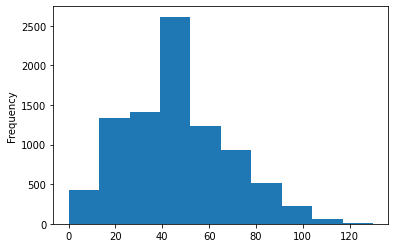

In [135]:
data.Rue_Ménilmontant.plot(kind="hist")

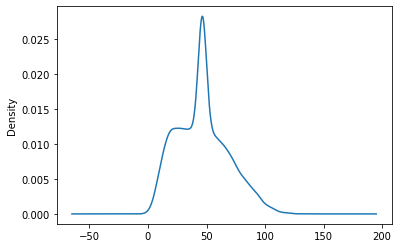

In [136]:
data.Rue_Ménilmontant.plot(kind="density")

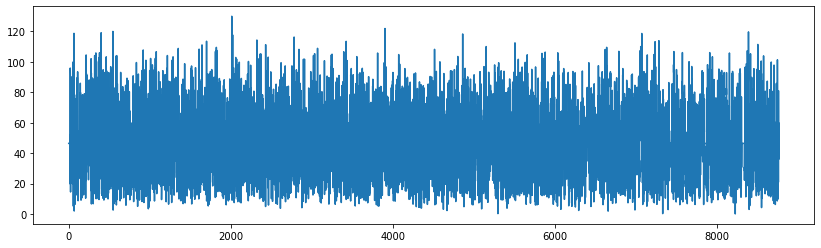

In [137]:
# Série temporelle
data.Rue_Ménilmontant.plot(y="Rue_Ménilmontant", figsize=(14,4))

Text(0.5, 1.0, 'Rue_Ménilmontant')

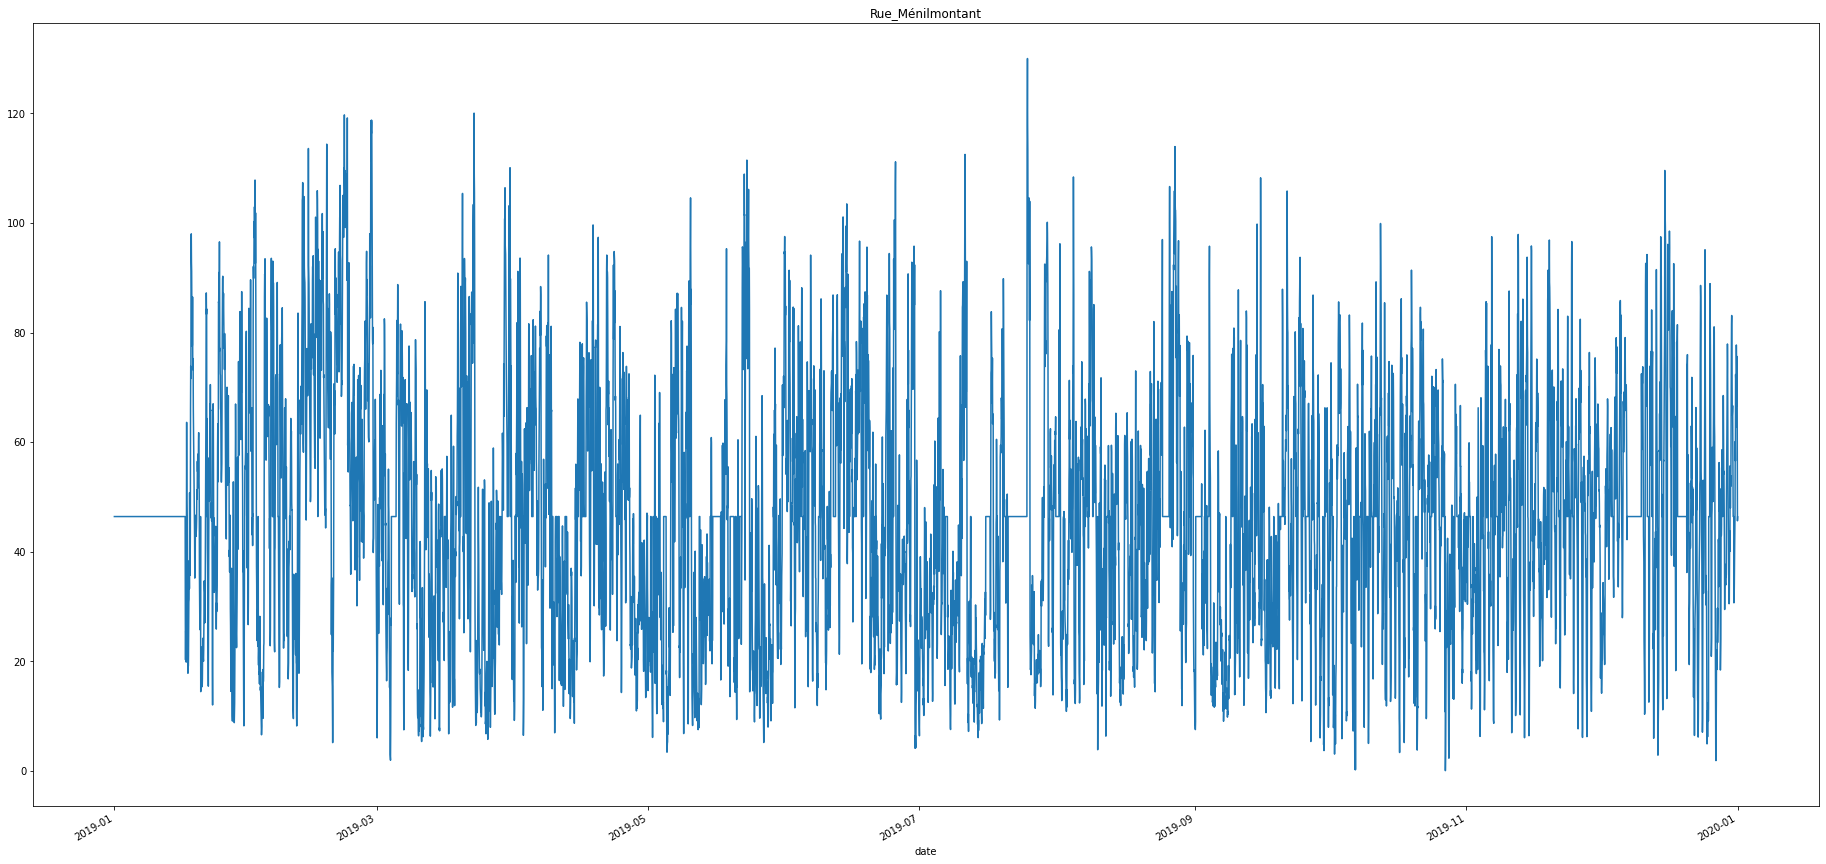

In [138]:
fig, ax = plt.subplots(figsize=(32,16))
df["Rue_Ménilmontant"].plot()
plt.title("Rue_Ménilmontant")

In [139]:
# Rue des Pyrénées

In [140]:
data.Rue_des_Pyrénées.describe()
# La moyenne des relevés est de 41,69 et donc supérieur à 40 µg/m3.
# L'écart type est de 20,17.
# La valeur minimale est de 0,05.
# 25% des relevés sont inférieurs ou égales à 26,74 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou egales à 41,62 > à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 53,83 > à 40 µg/m3.
# La valeur maximale est de 110,97 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       41.686898
std        20.167455
min         0.054235
25%        26.745490
50%        41.622235
75%        53.830406
max       110.967340
Name: Rue_des_Pyrénées, dtype: float64

In [141]:
taux_de_dispersion=data.Rue_des_Pyrénées.std()/data.Rue_des_Pyrénées.mean()*100     
taux_de_dispersion
# Les valeurs de la rue des Pyrénées sont dispersées à 48,38%.

48.378400225068134

In [142]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Rue_des_Pyrénées'] >= 40
data40.sum()
# 4622 valeurs sont au dessus de 40 µg/m3

4622

In [143]:
data40.sum()/data.shape[0]*100
# 52,76% des valeurs > 40 µg/m3

52.76255707762557

In [144]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Rue_des_Pyrénées'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [145]:
# Test de shapiro:
scipy.stats.shapiro(data.Rue_des_Pyrénées) 
# La P-value de 6e-36 est inférieure à 5% donc les valeurs de la rue Ménilmontant ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9759178161621094, 5.9968596927788605e-36)

In [146]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Rue_des_Pyrénées,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs de la rue Ménilmontant ne suivent pas la loi normale.

KstestResult(statistic=0.9970901398305111, pvalue=0.0)

In [147]:
data.Rue_des_Pyrénées.skew()
# La courbe de la rue des Pyrénées est asymétrique vers la droite

0.5266599187365184

In [148]:
data.Rue_des_Pyrénées.kurtosis()
# La courbe de la rue des Pyrénées est platykurtic

-0.08493660286363935

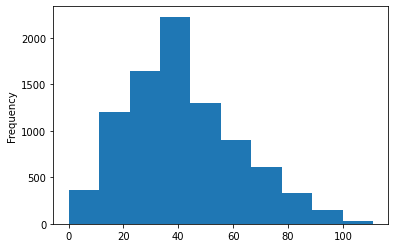

In [149]:
data.Rue_des_Pyrénées.plot(kind="hist")

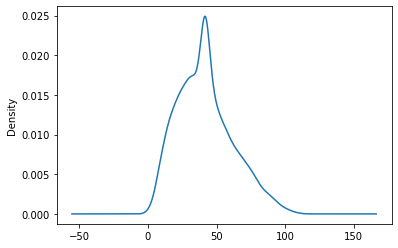

In [150]:
data.Rue_des_Pyrénées.plot(kind="density")

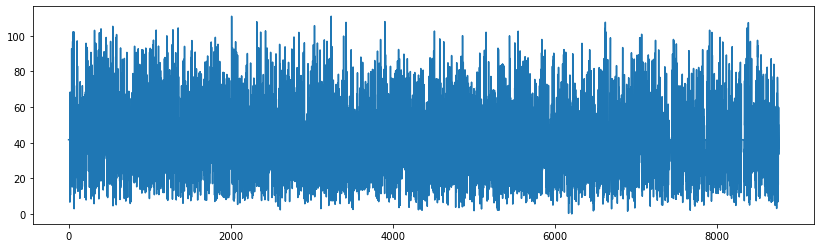

In [151]:
# Série temporelle
data.Rue_des_Pyrénées.plot(y="Rue_des_Pyrénées", figsize=(14,4))

Text(0.5, 1.0, 'Rue_des_Pyrénées')

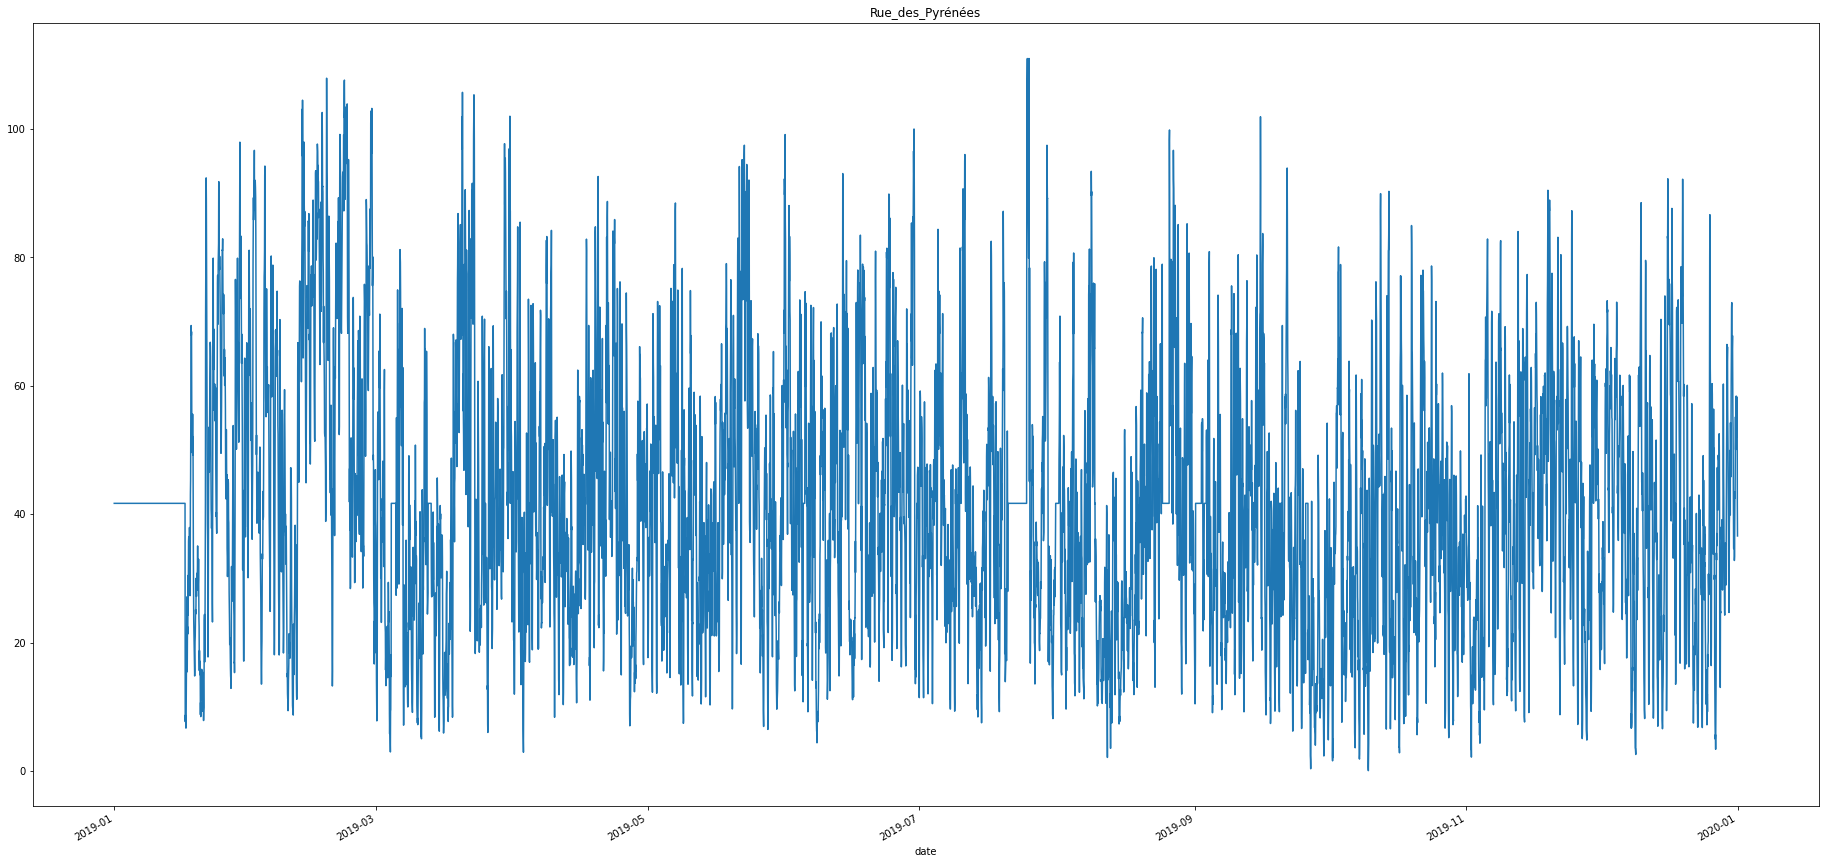

In [152]:
fig, ax = plt.subplots(figsize=(32,16))
df["Rue_des_Pyrénées"].plot()
plt.title("Rue_des_Pyrénées")

In [153]:
# Place Saint Fargeau

In [154]:
data.Place_St_Fargeau.describe()
# La moyenne des relevés est de 44,15 et donc supérieur à 40 µg/m3.
# L'écart type est de 14,24.
# La valeur minimale est de 11,03.
# 25% des relevés sont inférieurs ou égales à 35,06 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou égales à 44,15 > à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 51,72 > à 40 µg/m3.
# La valeur maximale est de 99,98 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       44.150209
std        14.239261
min        11.026864
25%        35.058683
50%        44.150209
75%        51.724130
max        99.980426
Name: Place_St_Fargeau, dtype: float64

In [155]:
taux_de_dispersion=data.Place_St_Fargeau.std()/data.Place_St_Fargeau.mean()*100     
taux_de_dispersion
# Les valeurs de la Place Saint Fargeau sont dispersées à 32,25%.

32.25185439159179

In [156]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Place_St_Fargeau'] >= 40
data40.sum()
# 5674 valeurs sont au dessus de 40 µg/m3

5674

In [157]:
data40.sum()/data.shape[0]*100
# 64,77% des valeurs > 40 µg/m3

64.7716894977169

In [158]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Place_St_Fargeau'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [159]:
# Test de shapiro:
scipy.stats.shapiro(data.Place_St_Fargeau) 
# La P-value de 3,14e-34 est inférieure à 5% donc les valeurs de la Place Saint Fargeau ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9786368608474731, 3.1366585904317195e-34)

In [160]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Place_St_Fargeau,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs de la Place Saint Fargeau ne suivent pas la loi normale.

KstestResult(statistic=1.0, pvalue=0.0)

In [161]:
data.Place_St_Fargeau.skew()
# La courbe de la Place Saint Fargeau est asymétrique vers la droite

0.4354015656328124

In [162]:
data.Place_St_Fargeau.kurtosis()
# La courbe de la Place Saint Fargeau est platykurtic

0.5146147242847041

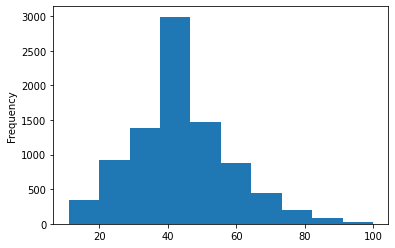

In [163]:
data.Place_St_Fargeau.plot(kind="hist")

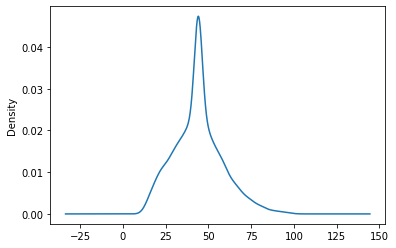

In [164]:
data.Place_St_Fargeau.plot(kind="density")

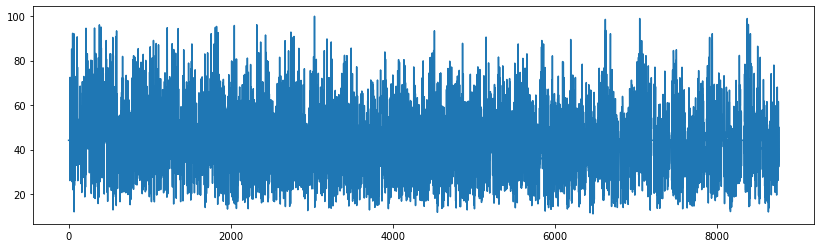

In [165]:
# Série temporelle
data.Place_St_Fargeau.plot(y="Place_St_Fargeau", figsize=(14,4))

Text(0.5, 1.0, 'Place_St_Fargeau')

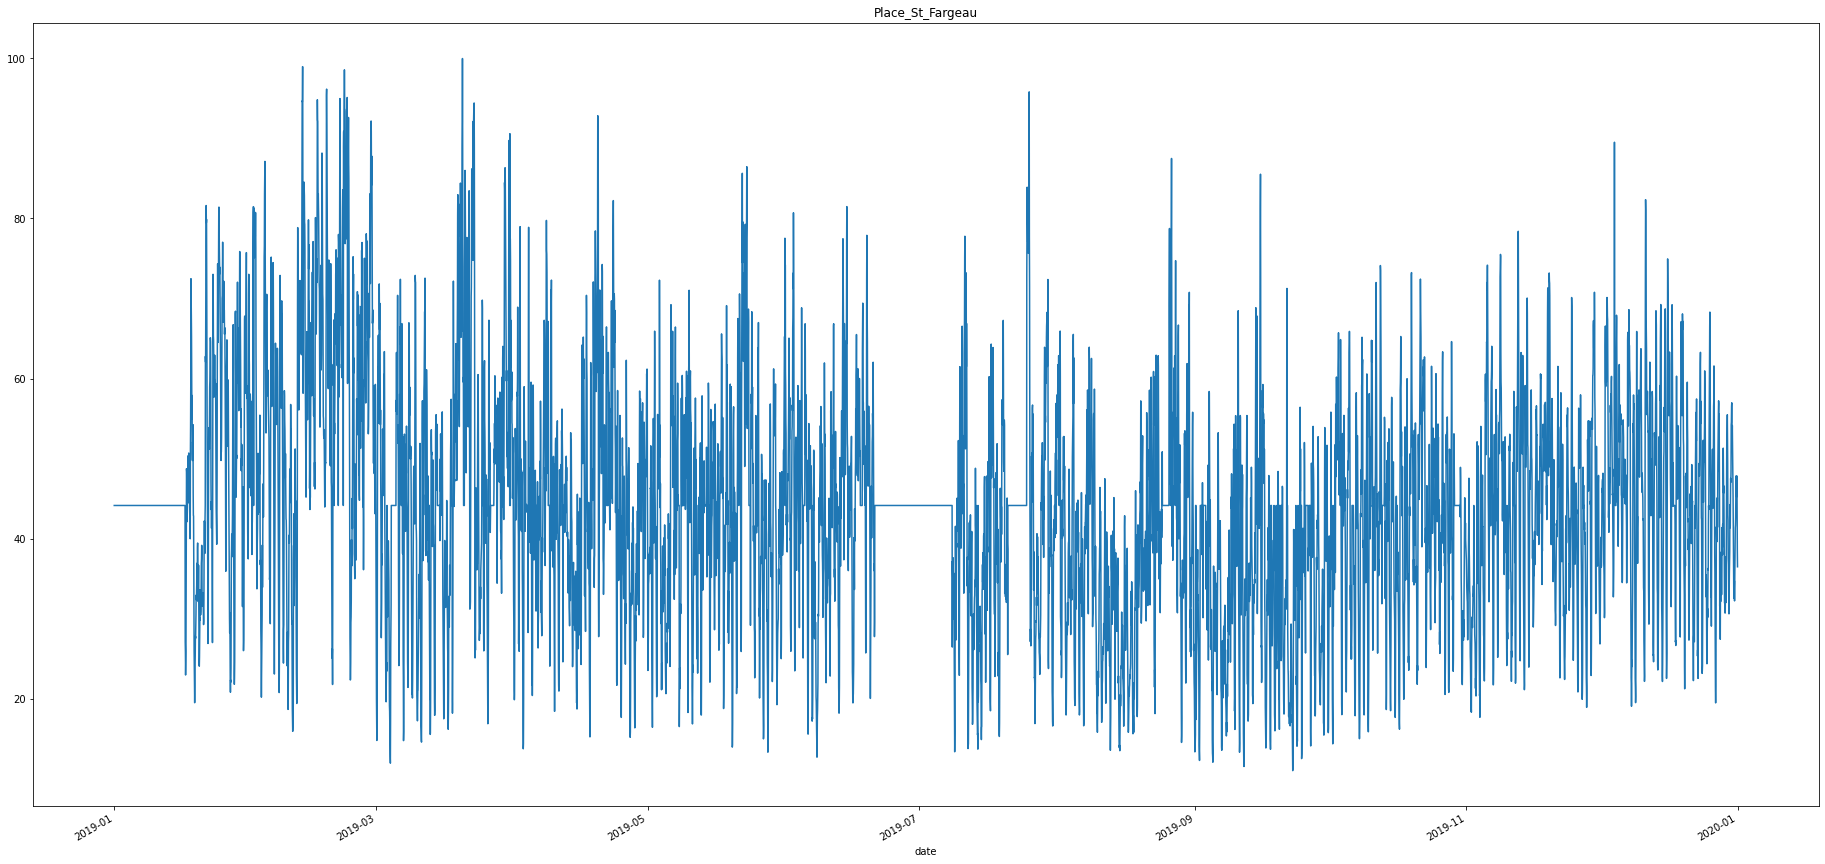

In [166]:
fig, ax = plt.subplots(figsize=(32,16))
df["Place_St_Fargeau"].plot()
plt.title("Place_St_Fargeau")

In [167]:
# Echangeur A3 BP

In [168]:
data.Echangeur_A3_BP.describe()
# La moyenne des relevés est de 54,13 et donc supérieur à 40 µg/m3.
# L'écart type est de 18,57.
# La valeur minimale est de 4,44.
# 25% des relevés sont inférieurs ou égales à 42,46 > à 40 µg/m3.
# 50% des relevés sont inferieurs ou égales à 54,13 > à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 64,68 > à 40 µg/m3.
# La valeur maximale est de 138,49 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       54.128323
std        18.565444
min         4.439950
25%        42.457495
50%        54.128323
75%        64.680956
max       138.491991
Name: Echangeur_A3_BP, dtype: float64

In [169]:
taux_de_dispersion=data.Echangeur_A3_BP.std()/data.Echangeur_A3_BP.mean()*100     
taux_de_dispersion
# Les valeurs de l'Echangeur A3 BP  sont dispersées à 34,3%.

34.29894618009724

In [170]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Echangeur_A3_BP'] >= 40
data40.sum()
# 6913 valeurs sont au dessus de 40 µg/m3

6913

In [171]:
data40.sum()/data.shape[0]*100
# 78,92% des valeurs > 40 µg/m3

78.91552511415524

In [172]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Echangeur_A3_BP'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [173]:
# Test de shapiro:
scipy.stats.shapiro(data.Echangeur_A3_BP) 
# La P-value de 2,18e-26 est inférieure à 5% donc les valeurs de l'Echangeur A3 BP ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.988178551197052, 2.1826385333441705e-26)

In [174]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Echangeur_A3_BP,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs de l'Echangeur A3 BP ne suivent pas la loi normale.

KstestResult(statistic=0.9999955010202668, pvalue=0.0)

In [175]:
data.Echangeur_A3_BP.skew()
# La courbe de l'Echangeur A3 BP est asymétrique vers la droite

0.32163818861457805

In [176]:
data.Echangeur_A3_BP.kurtosis()
# La courbe de l'Echangeur A3 BP est platykurtic

0.47537591617970554

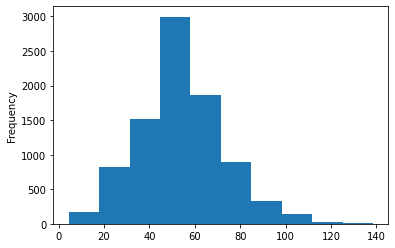

In [177]:
data.Echangeur_A3_BP.plot(kind="hist")

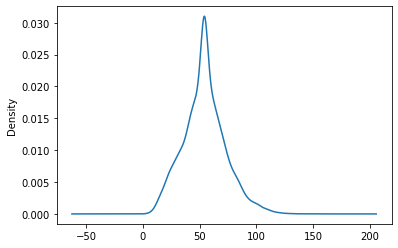

In [178]:
data.Echangeur_A3_BP.plot(kind="density")

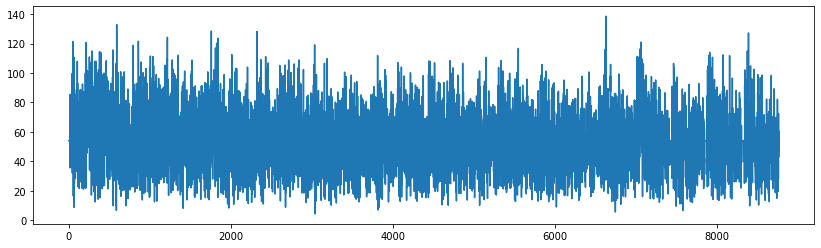

In [179]:
# Série temporelle
data.Echangeur_A3_BP.plot(y="Echangeur_A3_BP", figsize=(14,4))

Text(0.5, 1.0, 'Echangeur_A3_BP')

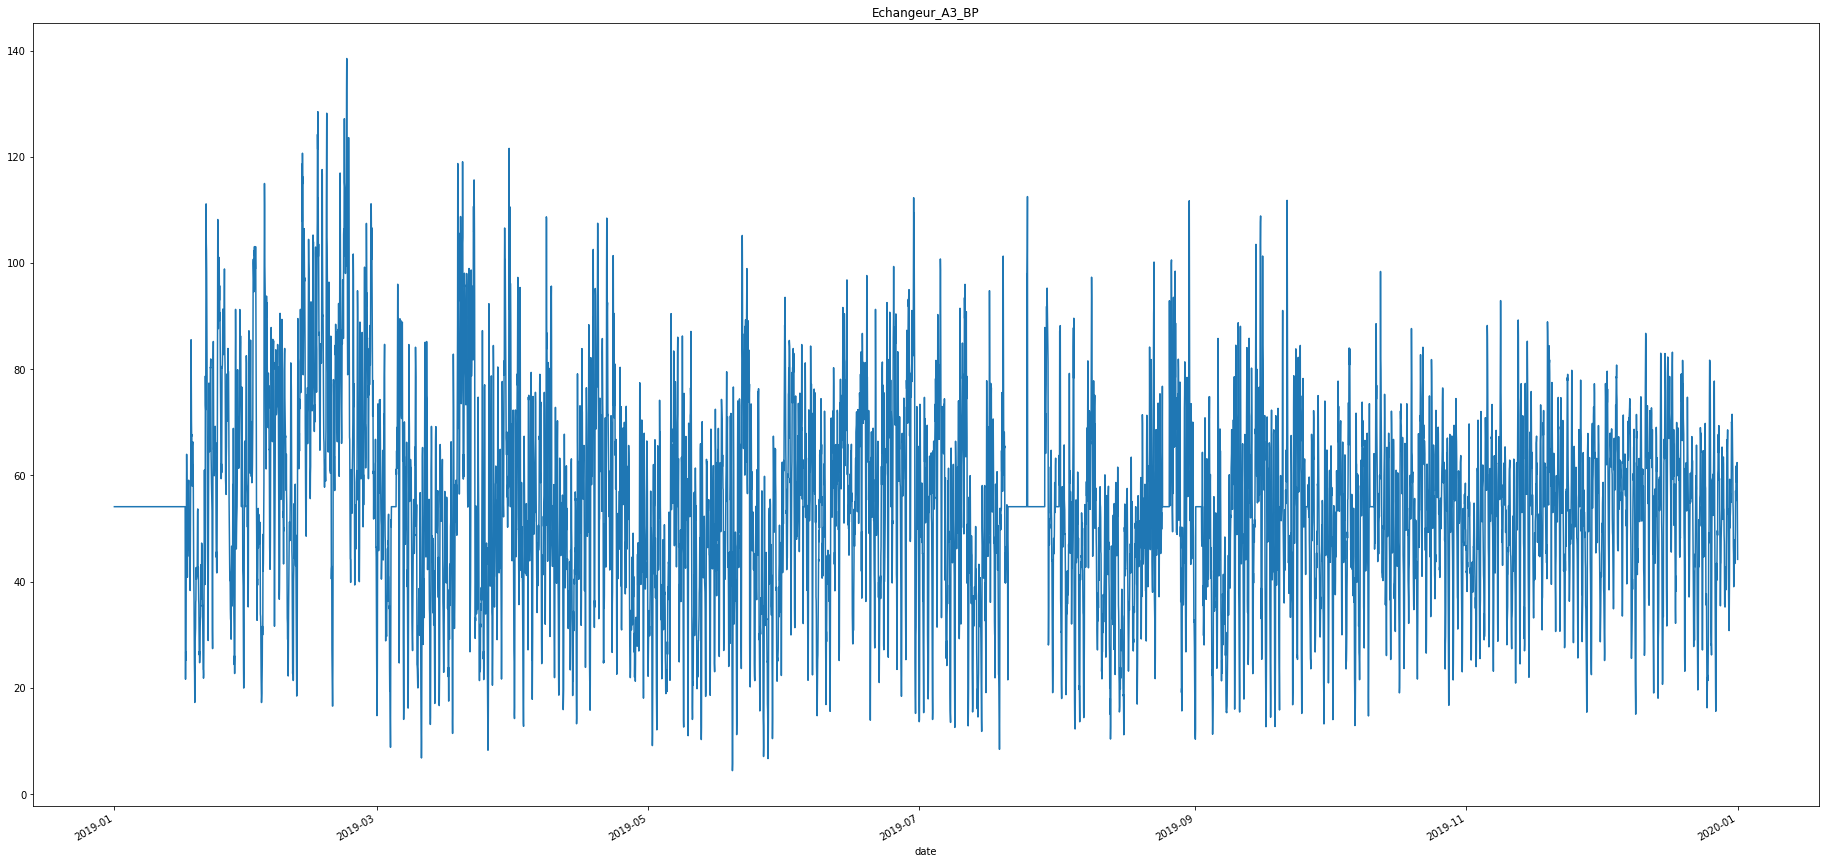

In [180]:
fig, ax = plt.subplots(figsize=(32,16))
df["Echangeur_A3_BP"].plot()
plt.title("Echangeur_A3_BP")

In [181]:
# Station référence BP Est

In [182]:
data.Station_Référence_BP_Est.describe()
# La moyenne des relevés est de 60,65 et donc supérieur à 40 µg/m3.
# L'écart type est de 31,63.
# La valeur minimale est de 4,4.
# 25% des relevés sont inférieurs ou égales à 36,4 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou égales à 59,6 > à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 80,7 > à 40 µg/m3.
# La valeur maximale est de 213,7 et donc supérieure à 40 µg/m3 puis à 200 µg/m3.

count    8760.000000
mean       60.645586
std        31.626935
min         4.400000
25%        36.400000
50%        59.600000
75%        80.700000
max       213.700000
Name: Station_Référence_BP_Est, dtype: float64

In [183]:
taux_de_dispersion=data.Station_Référence_BP_Est.std()/data.Station_Référence_BP_Est.mean()*100     
taux_de_dispersion
# Les valeurs de la Station Référence BP Est A3 BP  sont dispersées à 52,15%

52.15043194577764

In [184]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Station_Référence_BP_Est'] >= 40
data40.sum()
# 6244 valeurs sont au dessus de 40 µg/m3

6244

In [185]:
data40.sum()/data.shape[0]*100
# 71,27% des valeurs > 40 µg/m3

71.27853881278538

In [186]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Station_Référence_BP_Est'] >= 200
data200.sum()
# 2 valeurs sont au dessus de 200 µg/m3

2

In [187]:
data200.sum()/data.shape[0]*100
# 0,02% des valeurs > 200 µg/m3

0.0228310502283105

In [188]:
# Test de shapiro:
scipy.stats.shapiro(data.Station_Référence_BP_Est) 
# La P-value de 4,54e-36 est inférieure à 5% donc les valeurs de la Station Référence BP Est ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9757176637649536, 4.545202731910439e-36)

In [189]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Station_Référence_BP_Est,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs de la Station Référence BP Est ne suivent pas la loi normale.

KstestResult(statistic=0.9999945874560923, pvalue=0.0)

In [190]:
data.Station_Référence_BP_Est.skew()
# La courbe de la Station Référence BP Est est asymétrique vers la droite

0.5251583066772139

In [191]:
data.Station_Référence_BP_Est.kurtosis()
# La courbe de la Station Référence BP Est est platykurtic

0.18950051190656847

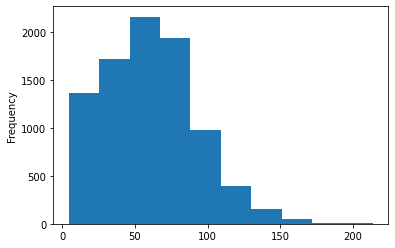

In [192]:
data.Station_Référence_BP_Est.plot(kind="hist")

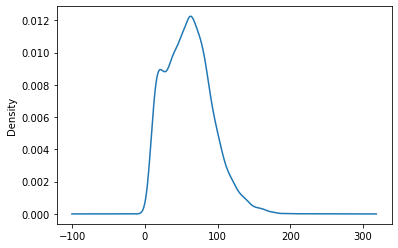

In [193]:
data.Station_Référence_BP_Est.plot(kind="density")

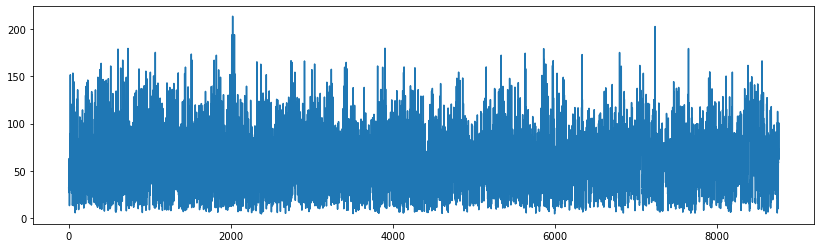

In [194]:
# Série temporelle
data.Station_Référence_BP_Est.plot(y="Station_Référence_BP_Est", figsize=(14,4))

Text(0.5, 1.0, 'Station_Référence_BP_Est')

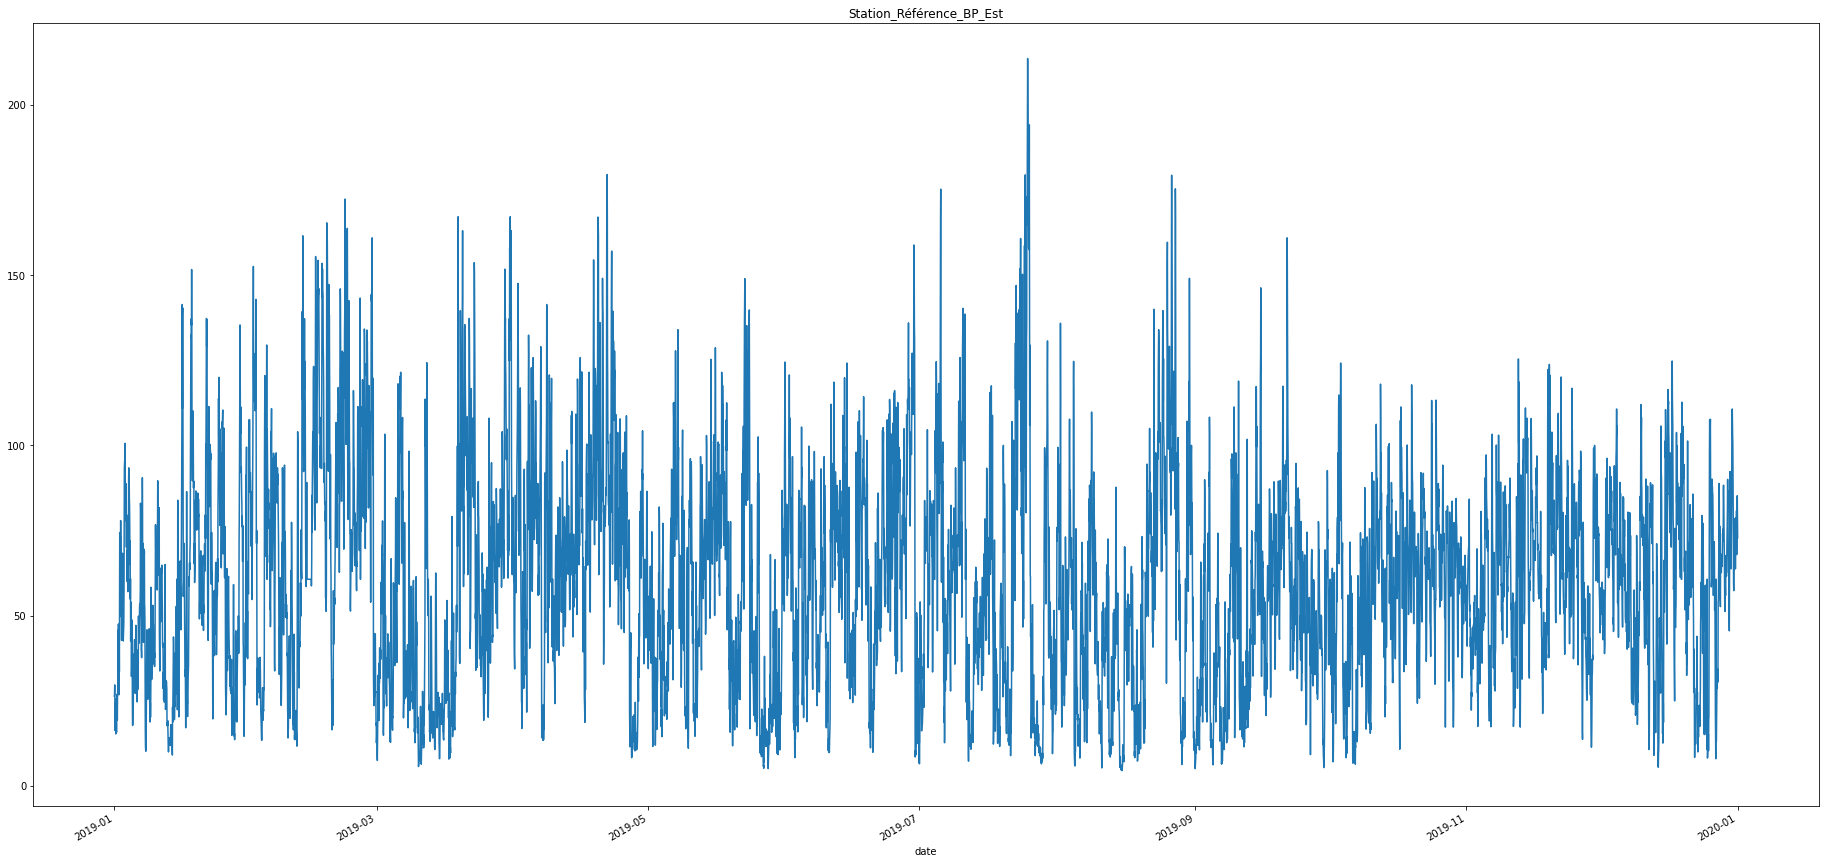

In [195]:
fig, ax = plt.subplots(figsize=(32,16))
df["Station_Référence_BP_Est"].plot()
plt.title("Station_Référence_BP_Est")

In [196]:
# Station référence Paris 18ème

In [197]:
data.Station_Référence_Paris_18ème.describe()
# La moyenne des relevés est de 29,9 et donc inférieur à 40 µg/m3.
# L'écart type est de 21,61.
# La valeur minimale est de 2.
# 25% des relevés sont inférieurs ou égales à 12,3 < à 40 µg/m3.
# 50% des relevés sont inferieurs ou égales à 25,1 < à 40 µg/m3.
# 75% des relevés dont inférieurs ou égales à 41,53 > à 40 µg/m3.
# La valeur maximale est de 139,8 et donc supérieure à 40 µg/m3.

count    8760.000000
mean       29.860503
std        21.613054
min         2.000000
25%        12.300000
50%        25.100000
75%        41.525000
max       139.800000
Name: Station_Référence_Paris_18ème, dtype: float64

In [198]:
taux_de_dispersion=data.Station_Référence_Paris_18ème.std()/data.Station_Référence_Paris_18ème.mean()*100     
taux_de_dispersion
# Les valeurs de la Station Référence Paris 18ème sont dispersées à 72,38%.

72.38007294532554

In [199]:
# Valeurs au dessus de 40 µg/m3.
data40=data['Station_Référence_Paris_18ème'] >= 40
data40.sum()
# 2352 valeurs sont au dessus de 40 µg/m3

2352

In [200]:
data40.sum()/data.shape[0]*100
# 26,85% des valeurs > 40 µg/m3

26.84931506849315

In [201]:
# Valeurs au dessus de 200 µg/m3.
data200=data['Station_Référence_Paris_18ème'] >= 200
data200.sum()
# Aucune valeur n'est au dessus de 200 µg/m3

0

In [202]:
# Test de shapiro:
scipy.stats.shapiro(data.Station_Référence_Paris_18ème) 
# La P-value de 0 est inférieure à 5% donc les valeurs de la Station Référence Paris 18ème ne suivent pas la loi normale.

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8909868001937866, 0.0)

In [203]:
#Test de Kolmogorov:
scipy.stats.kstest(data.Station_Référence_Paris_18ème,"norm")
#  La P-value de 0 est inférieure à 5% donc les valeurs de la Station Référence Paris 18ème ne suivent pas la loi normale.

KstestResult(statistic=0.9989781392274738, pvalue=0.0)

In [204]:
data.Station_Référence_Paris_18ème.skew()
# La courbe de la Station Référence Paris 18ème est asymétrique vers la droite

1.292592165256776

In [205]:
data.Station_Référence_Paris_18ème.kurtosis()
# La courbe de la Station Référence Paris 18ème est platykurtic

1.9477678748730956

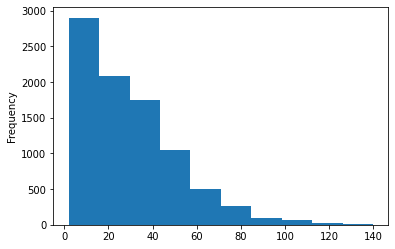

In [206]:
data.Station_Référence_Paris_18ème.plot(kind="hist")

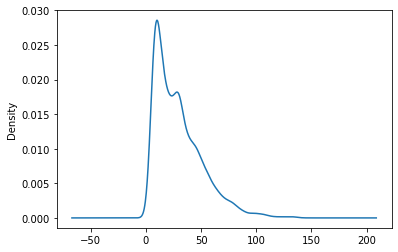

In [207]:
data.Station_Référence_Paris_18ème.plot(kind="density")

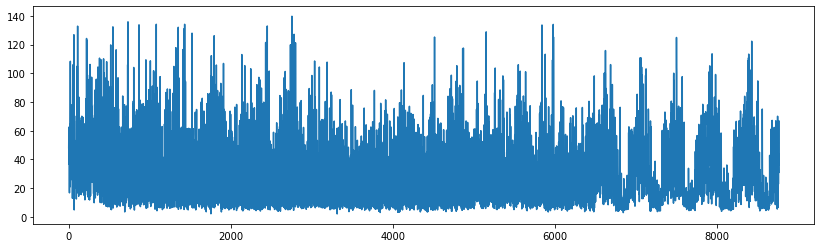

In [208]:
# Série temporelle
data.Station_Référence_Paris_18ème.plot(y="Station_Référence_Paris_18ème", figsize=(14,4))

Text(0.5, 1.0, 'Station_Référence_Paris_18ème')

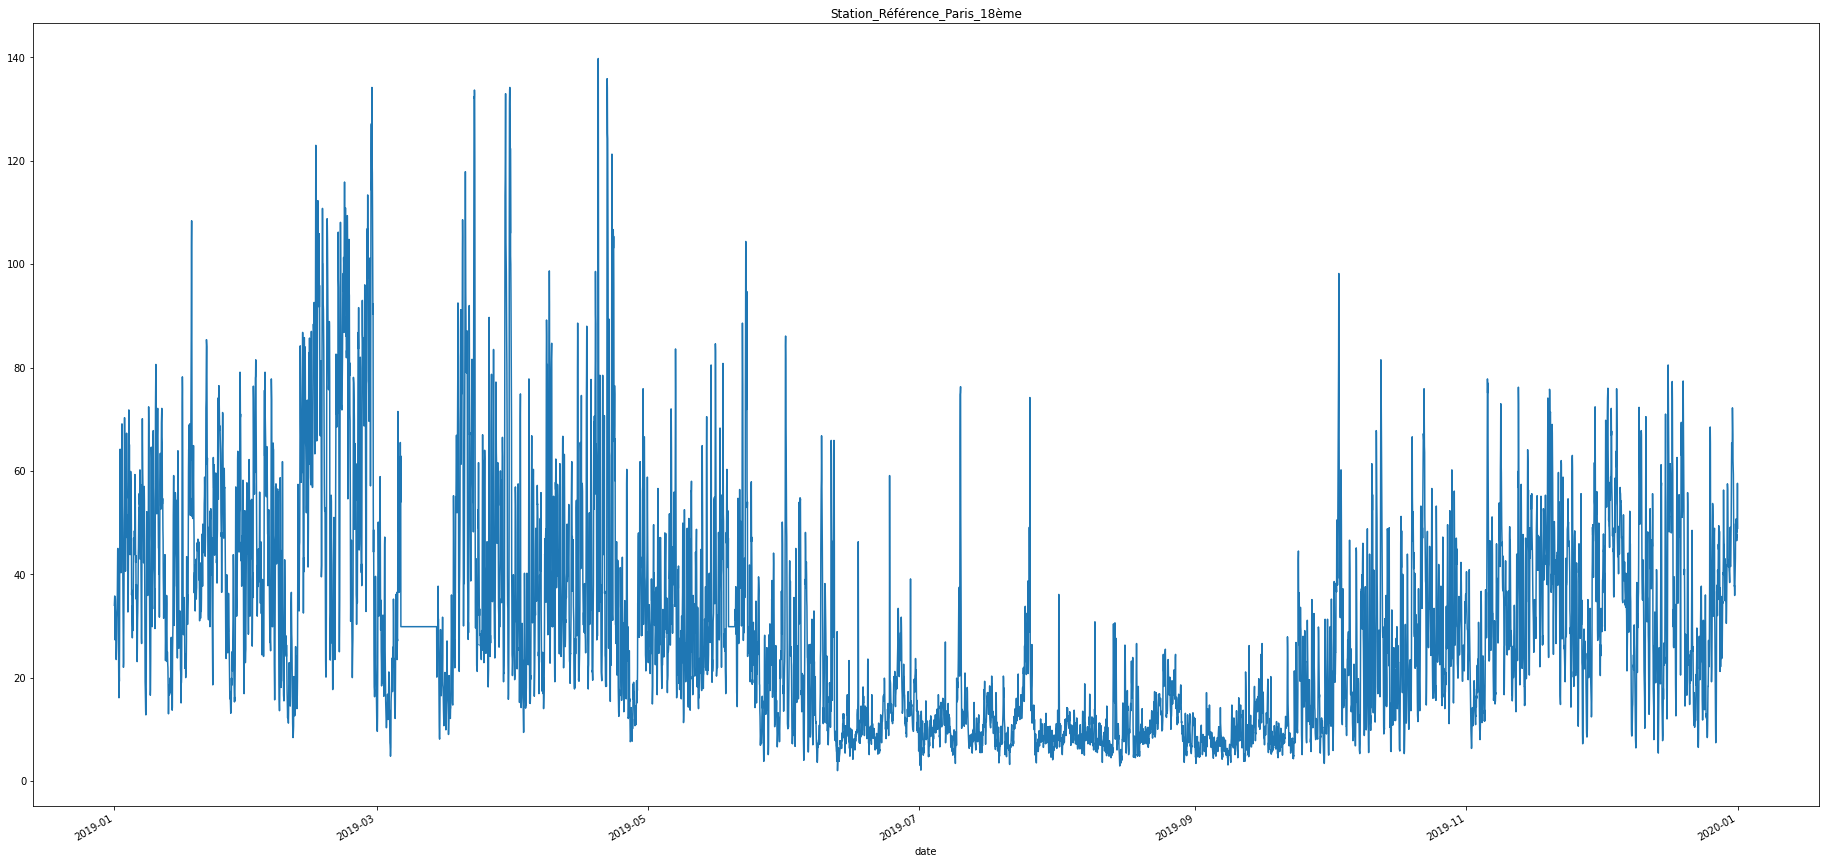

In [209]:
fig, ax = plt.subplots(figsize=(32,16))
df["Station_Référence_Paris_18ème"].plot()
plt.title("Station_Référence_Paris_18ème")

In [210]:
# Analyse par secteur

In [211]:
# Stations au niveau du périphérique

data_periph=data[['date_et_heure_de_la_mesure','Echangeur_A3_BP','Station_Référence_BP_Est']]
data_periph

date_et_heure_de_la_mesure  Echangeur_A3_BP  Station_Référence_BP_Est
0     2019-01-04T21:00:00+01:00        54.128323                      32.1
1     2019-01-05T18:00:00+01:00        54.128323                      27.1
2     2019-01-09T06:00:00+01:00        54.128323                      31.3
3     2019-01-09T14:00:00+01:00        54.128323                      48.4
4     2019-01-09T15:00:00+01:00        54.128323                      51.6
...                         ...              ...                       ...
8755  2019-12-28T14:00:00+01:00        56.162960                      71.0
8756  2019-12-29T11:00:00+01:00        46.805350                      61.9
8757  2019-12-30T22:00:00+01:00        60.685660                     100.8
8758  2019-12-31T08:00:00+01:00        47.836970                      69.5
8759  2019-12-31T09:00:00+01:00        43.430200                      73.3

[8760 rows x 3 columns]

In [212]:
data_periph['Month']=data_periph['date_et_heure_de_la_mesure'].str.slice(0, 7)
data_periph_month_mean=data_periph.groupby(['Month']).mean().round(2)
data_periph_month_max=data_periph.groupby(['Month']).max().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


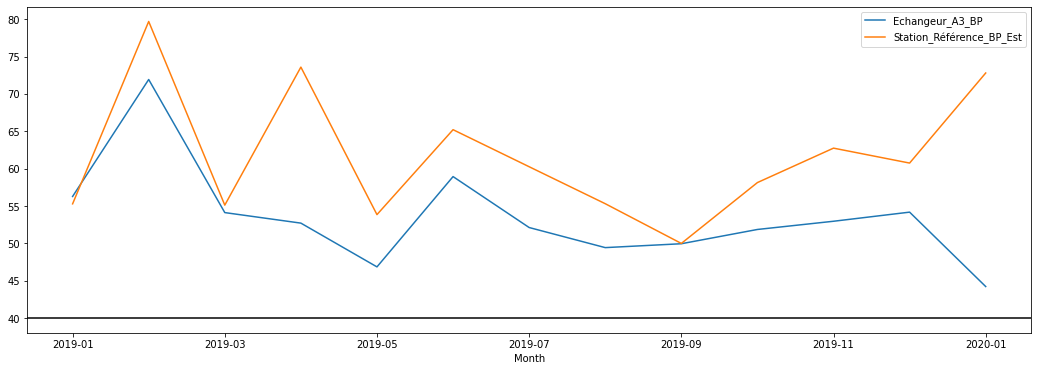

In [213]:
data_periph_month_mean.plot(figsize=(18,6))
plt.axhline(y=40, color='black')

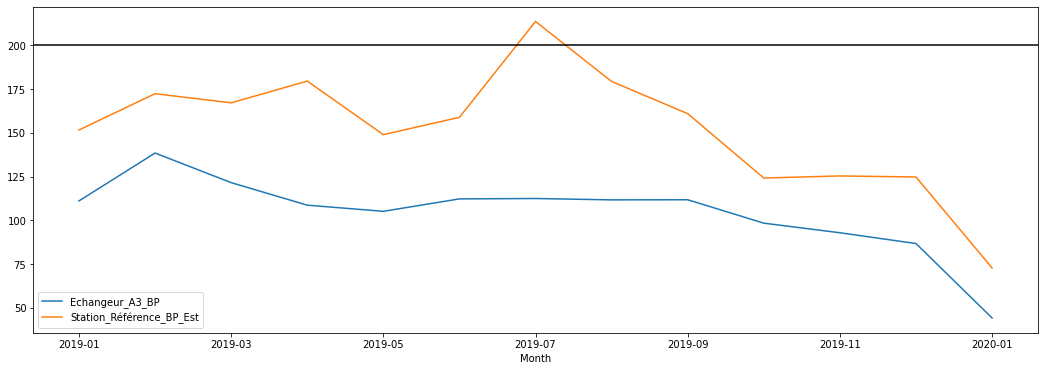

In [214]:
data_periph_month_max.plot(figsize=(18,6))
plt.axhline(y=200, color='black')

In [215]:
data_periph.describe().T

count       mean        std      min        25%  \
Echangeur_A3_BP           8760.0  54.128323  18.565444  4.43995  42.457495   
Station_Référence_BP_Est  8760.0  60.645586  31.626935  4.40000  36.400000   

                                50%        75%         max  
Echangeur_A3_BP           54.128323  64.680956  138.491991  
Station_Référence_BP_Est  59.600000  80.700000  213.700000

. Capteurs au niveau du boulevard périphérique : (Echangeur A3 BP, Station référence BP Est)

Les moyennes sont quasiment identiques avec des taux supérieurs à 40 µg/m3. Les valeurs minimales sont identiques à 4 µg/m3. Les interquartiles sont tous supérieurs à 40 µg/m3. Les valeurs maximales sont très élevées avec des taux supérieurs à 200 µg/m3 pour la station référence BP Est. Les valeurs sont moyennement dispersées. 75% des valeurs sont au dessus de 40 µg/m3. 0,02% des valeurs de la station référence BP Est sont au dessus de 200 µg/m3.

Conclusion:
Les valeurs des deux stations sont similaires avec majoritairement des taux  supérieures à 40µg/m3 compris entre 70 et 80% et également un taux de 0,02% pour des valeurs supérieures à 200µg/m3 pour la station référence BP Est. 
Ce secteur abrite un flux de circulation très dense ce qui explique ces hauts taux de pollution.

In [216]:
# Stations en zone urbaine

data_zone_urbaine=data[['date_et_heure_de_la_mesure','Bd_Ménilmontant','Rue_Ménilmontant','Rue_des_Pyrénées','Place_St_Fargeau','Station_Référence_Paris_18ème']]

In [217]:
data_zone_urbaine['Month']=data_zone_urbaine['date_et_heure_de_la_mesure'].str.slice(0, 7)
data_zone_urbaine_month_mean=data_zone_urbaine.groupby(['Month']).mean().round(2)
data_zone_urbaine_month_max=data_zone_urbaine.groupby(['Month']).max().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


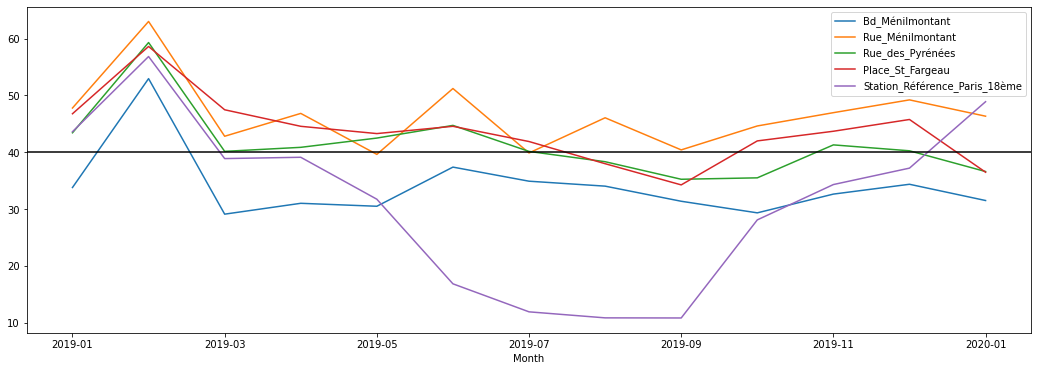

In [218]:
data_zone_urbaine_month_mean.plot(figsize=(18,6))
plt.axhline(y=40, color='black')

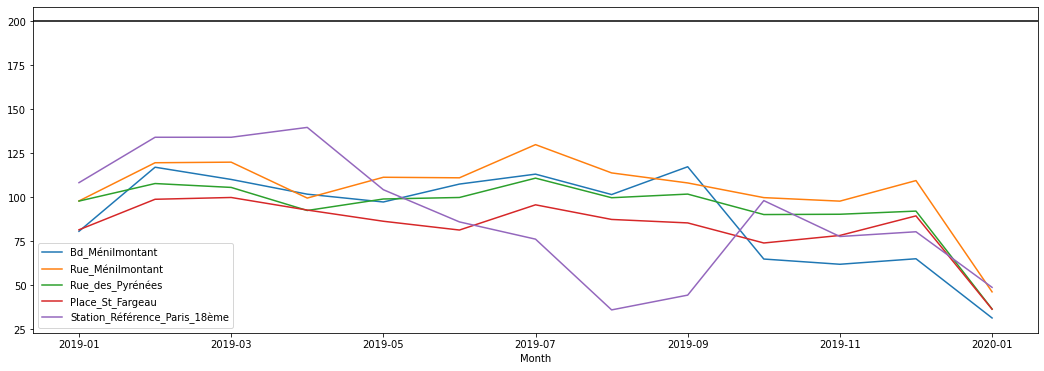

In [219]:
data_zone_urbaine_month_max.plot(figsize=(18,6))
plt.axhline(y=200, color='black')

In [220]:
data_zone_urbaine.describe().T

count       mean        std        min  \
Bd_Ménilmontant                8760.0  34.148261  18.206757   1.801964   
Rue_Ménilmontant               8760.0  46.407882  21.872280   0.025318   
Rue_des_Pyrénées               8760.0  41.686898  20.167455   0.054235   
Place_St_Fargeau               8760.0  44.150209  14.239261  11.026864   
Station_Référence_Paris_18ème  8760.0  29.860503  21.613054   2.000000   

                                     25%        50%        75%         max  
Bd_Ménilmontant                21.274928  34.148261  40.856889  117.436565  
Rue_Ménilmontant               29.877743  46.407882  59.869318  130.014038  
Rue_des_Pyrénées               26.745490  41.622235  53.830406  110.967340  
Place_St_Fargeau               35.058683  44.150209  51.724130   99.980426  
Station_Référence_Paris_18ème  12.300000  25.100000  41.525000  139.800000

. Capteurs en zone urbaine :
(Boulevard Ménilmontant, Rue Ménilmontant, Rue des Pyrénées, Place Saint Fargeau, Station référence Paris 18ème) 

Les valeurs moyennes sont quasiment identiques pour la rue Ménilmontant, la rue des Pyrénées et la place Saint Fargeau. Elles sont légèrement inférieures pour le boulevard Ménilmontant et la station référence Paris 18ème. Elles sont toutes inférieures à 40 µg/m3.
Les valeurs minimales sont quasiment identiques sauf pour la place Saint Fargeau où elles sont un peu plus élevées.
Les valeurs sont moyennement dispersées sauf pour la station référence Paris 18ème où elles sont plus dispersées.
26% des valeurs du boulevard Ménilmontant et de la station référence Paris 18ème sont supérieures à 40 µg/m3 tandis que pour les autres capteurs, elles sont environ de 60%.
Aucune valeur n'est au dessus de 200 µg/m3

Conclusion:
Les valeurs moyennes sont quasiment identiques, inférieures à 40µg/m3, avec une baisse dans l'ouest de l'arrondissement. Les taux supérieurs à 40µg/m3 sont identiques pour les stations dans le centre de l'arrondissement (60%) et plus faible dans l'ouest de l'arrondissement (26%). Aucune station n'a de valeurs supérieures à 200 µg/m3. Ce qui explique que plus les capteurs sont éloignés du périphérique, plus les valeurs sont basses.

In [221]:
# Stations en zone non urbaine

data_zone_non_urbaine=data[['date_et_heure_de_la_mesure','Pere_Lachaise','Parc_de_Belleville','Stade_Louis_Lumière']]

In [222]:
data_zone_non_urbaine['Month']=data_zone_non_urbaine['date_et_heure_de_la_mesure'].str.slice(0, 7)
data_zone_non_urbaine_month_mean=data_zone_non_urbaine.groupby(['Month']).mean().round(2)
data_zone_non_urbaine_month_max=data_zone_non_urbaine.groupby(['Month']).max().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


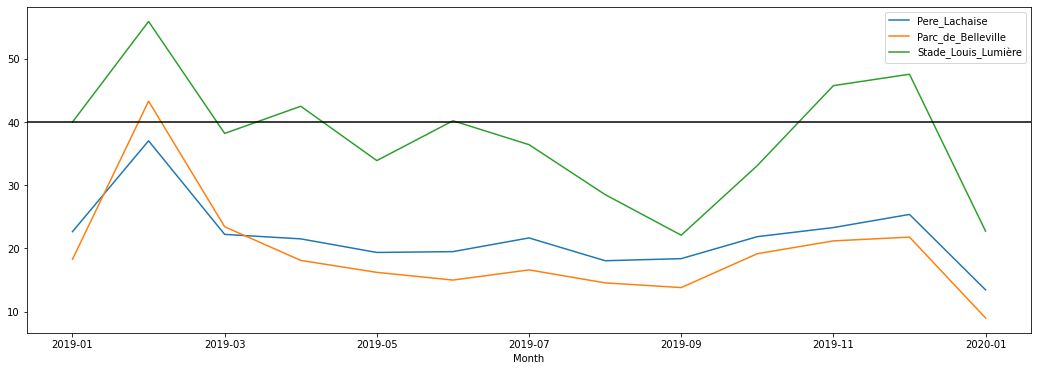

In [223]:
data_zone_non_urbaine_month_mean.plot(figsize=(18,6))
plt.axhline(y=40, color='black')

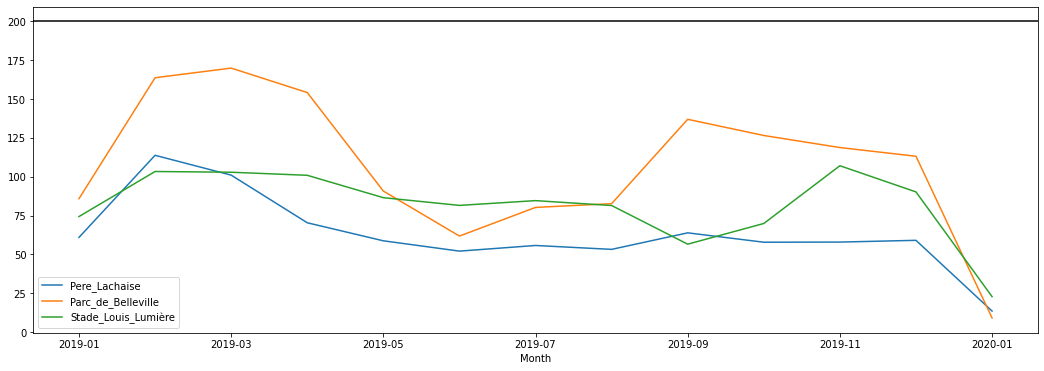

In [224]:
data_zone_non_urbaine_month_max.plot(figsize=(18,6))
plt.axhline(y=200, color='black')

In [225]:
data_zone_non_urbaine.describe().T

count       mean        std       min        25%  \
Pere_Lachaise        8760.0  22.484498  12.121777  5.277120  14.348507   
Parc_de_Belleville   8760.0  19.969951  20.433233  0.484373   8.135876   
Stade_Louis_Lumière  8760.0  38.560642  17.021287  4.515505  24.839267   

                           50%        75%         max  
Pere_Lachaise        20.870351  26.141510  113.782096  
Parc_de_Belleville   13.925615  23.261058  169.957657  
Stade_Louis_Lumière  38.560642  48.842551  107.071200

. Capteurs en zone non urbaine : 
(Père Lachaise, Parc de Belleville, Stade Louis Lumière) 

Les moyennes sont quasiment identiques pour le Père Lachaise et le Parc de Belleville. La moyenne pour le Stade Louis Lumière est un peu plus élevée à cause de sa proximité du boulevard périphérique. Les taux sont inférieurs à 40 µg/m3.
Les valeurs minimales sont quasiment les mêmes pour le Père Lachaise et le Stade Louis Lumière et un peu moins élevés pour le parc de Belleville.
Au moins 75% des valeurs sont inférieurs à 40 µg/m3 pour le Père Lachaise et le parc de Belleville. 
Les valeurs sont moyennement dispersées pour le Père Lachaise et le stade Louis Lumière tandis qu’elles sont très dispersées pour le parc de Belleville.  
Environ 10% des valeurs sont au dessus de 40 µg/m3 pour le Père Lachaise et le parc de Belleville tandis que pour le Stade Louis Lumière, elles sont de 40%, à cause de sa proximité du boulevard périphérique.
Aucune valeur n’est au dessus de 200 µg/m3.

Conclusion:
Les taux inférieures à 40µg/m3 (10%) sont relativement faibles dans les parcs et plus élevés sur le capteur proche du périphérique. Aucune station n'a de valeurs supérieures à 200 µg/m3.
La présence de végétation réduit les concentrations de NO2 mais un espace non urbain très proche du périphérique est impacté par les émissions de pollutions.

In [226]:
# Corrélation
(data.corr()*100).round(2)

Pere_Lachaise  Parc_de_Belleville  \
Pere_Lachaise                         100.00               85.79   
Parc_de_Belleville                     85.79              100.00   
Bd_Ménilmontant                        73.96               70.20   
Stade_Louis_Lumière                    67.97               58.70   
Rue_Ménilmontant                       62.60               59.33   
Rue_des_Pyrénées                       73.22               71.46   
Place_St_Fargeau                       75.16               70.51   
Echangeur_A3_BP                        72.23               65.62   
Station_Référence_BP_Est               57.22               55.77   
Station_Référence_Paris_18ème          61.63               63.07   

                               Bd_Ménilmontant  Stade_Louis_Lumière  \
Pere_Lachaise                            73.96                67.97   
Parc_de_Belleville                       70.20                58.70   
Bd_Ménilmontant                         100.00                67.64   
Stade_Louis_Lumière                      67.64               100.00   
Rue_Ménilmontant                         69.22                53.28   
Rue_des_Pyrénées                         85.56                63.53   
Place_St_Fargeau                         72.74                64.00   
Echangeur_A3_BP                          78.92                65.48   
Station_Référence_BP_Est                 67.94                70.49   
Station_Référence_Paris_18ème            51.09                59.01   

                               Rue_Ménilmontant  Rue_des_Pyrénées  \
Pere_Lachaise                             62.60             73.22   
Parc_de_Belleville                        59.33             71.46   
Bd_Ménilmontant                           69.22             85.56   
Stade_Louis_Lumière                       53.28             63.53   
Rue_Ménilmontant                         100.00             71.62   
Rue_des_Pyrénées                          71.62            100.00   
Place_St_Fargeau                          70.76             80.25   
Echangeur_A3_BP                           78.40             82.36   
Station_Référence_BP_Est                  61.28             63.95   
Station_Référence_Paris_18ème             43.39             55.84   

                               Place_St_Fargeau  Echangeur_A3_BP  \
Pere_Lachaise                             75.16            72.23   
Parc_de_Belleville                        70.51            65.62   
Bd_Ménilmontant                           72.74            78.92   
Stade_Louis_Lumière                       64.00            65.48   
Rue_Ménilmontant                          70.76            78.40   
Rue_des_Pyrénées                          80.25            82.36   
Place_St_Fargeau                         100.00            83.54   
Echangeur_A3_BP                           83.54           100.00   
Station_Référence_BP_Est                  55.49            63.37   
Station_Référence_Paris_18ème             59.06            47.39   

                               Station_Référence_BP_Est  \
Pere_Lachaise                                     57.22   
Parc_de_Belleville                                55.77   
Bd_Ménilmontant                                   67.94   
Stade_Louis_Lumière                               70.49   
Rue_Ménilmontant                                  61.28   
Rue_des_Pyrénées                                  63.95   
Place_St_Fargeau                                  55.49   
Echangeur_A3_BP                                   63.37   
Station_Référence_BP_Est                         100.00   
Station_Référence_Paris_18ème                     51.25   

                               Station_Référence_Paris_18ème  
Pere_Lachaise                                          61.63  
Parc_de_Belleville                                     63.07  
Bd_Ménilmontant                                        51.09  
Stade_Louis_Lumière                                    59.01  
Rue_Ménilmontant          

Text(0.5, 1.0, 'Correlation')

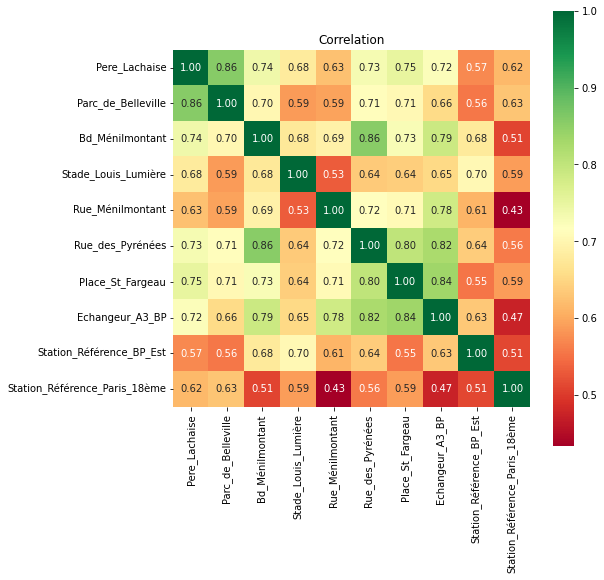

In [227]:
rcParams['figure.figsize'] = (8, 8)
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')
plt.title('Correlation')

**Valeurs liées: **
Père Lachaise/Parc de Belleville (0,86): Stations dans deux parcs éloignées du périphérique.

Rue des pyrénées/ Boulevard Ménilmontant (0,86): Stations proches éloignées du périphérique. 

Rue des Pyrénées/Place Saint Fargeau (0,8): Stations proches dans le centre du 20ème arrondissement.

Rue des Pyrénées/ Echangeur A3 BP (0,82): Station du centre de l'arrondissement proche du périphérique.

Place Saint Fargeau/ Echangeur A3 BP (0,84): Station au centre dans le nord de l'arrondissement proche du périphérique.

Conclusion:
Les valeurs dans les deux parc sont liées.
Les stations dans l'ouest du 20ème donc éloignées du périphérique sont liées.
Les valeurs des stations dans le centre du 20ème et proches du périphérique sont liées avec les valeurs de l'échangeur A3 BP.

Les stations proches les unes des autres évoluent ensembles. 
la circulation sur le boulevard périphérique impacte les zones aux alentours. En s'écartant vers le centre de Paris, l'impact est moindre.

**Valeurs assez liées:**
Père Lachaise/ Boulevard Ménilmontant
             / Place Saint Fargeau
             / Echangeur A3 BP
    
Par de Belleville/ Boulevard Ménilmontant
                 / Rue des Pyrénées
                 / Place Saint Fargeau
    
Boulevard Ménilmontant/ Place Saint Fargeau
                      / Echangeur A3 BP


Stade Louis Lumière/ Echangeur BP Est

Rue Ménilmontant/ Rue des Pyrénées
                / Place Saint Fargeau
                / Echangeur A3 BP
          
Conclusion:
Les stations du centre du 20ème sont assez impactées par la circulation sur le périphérique.
Les stations sont assez liées aux stations avoisinantes.


Les valeurs de la station référence Paris 18ème sont moyennement corrélées à toutes les autres valeurs de part son éloignement géographique.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

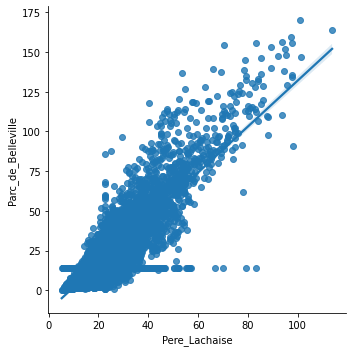

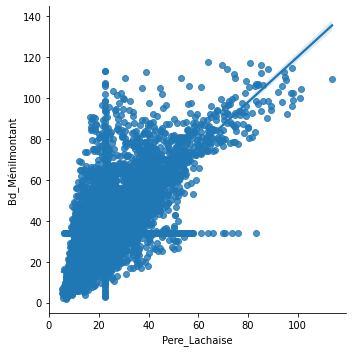

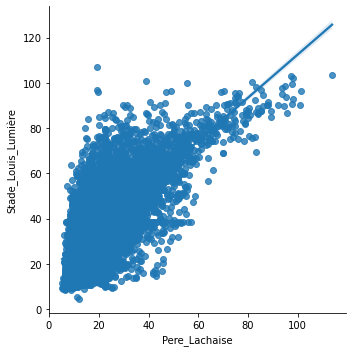

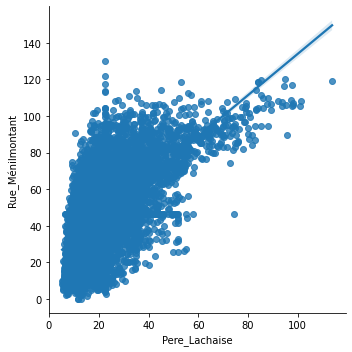

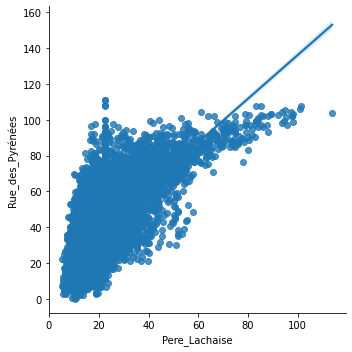

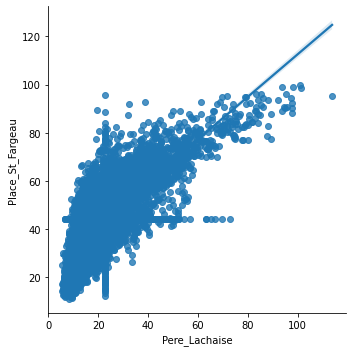

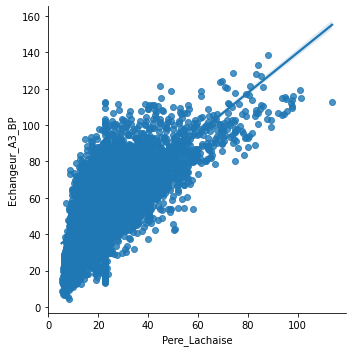

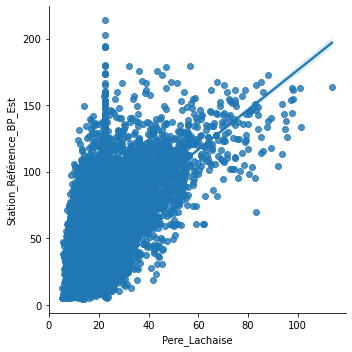

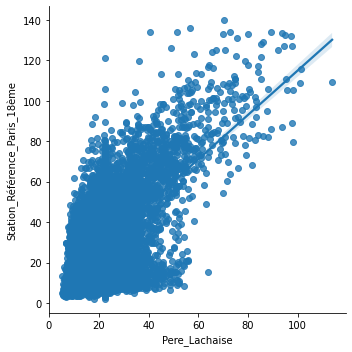

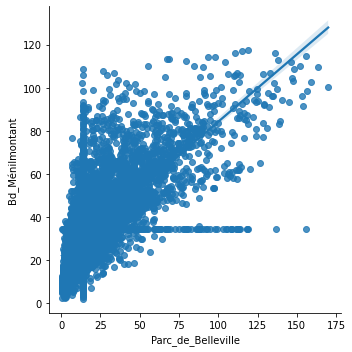

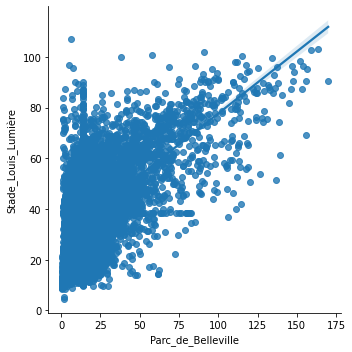

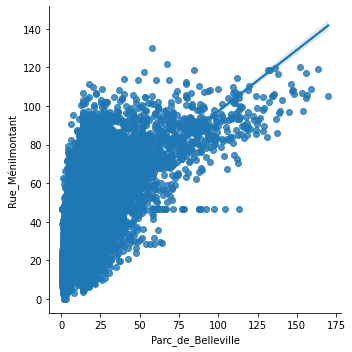

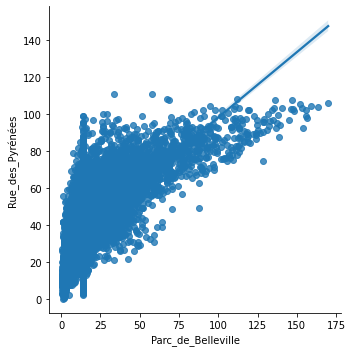

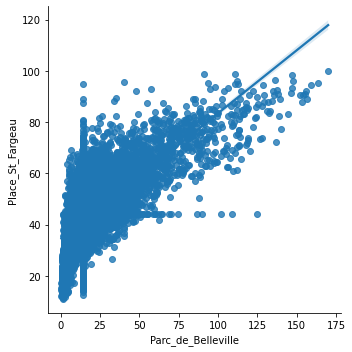

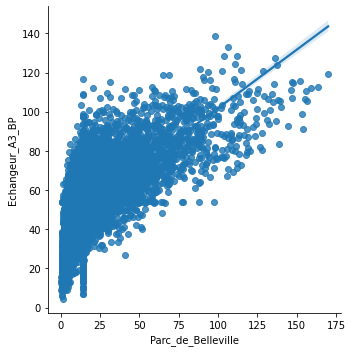

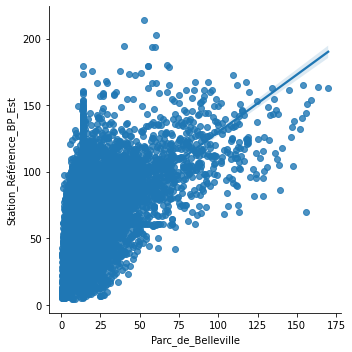

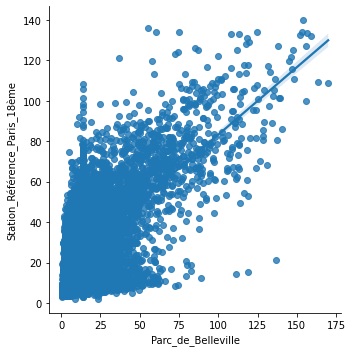

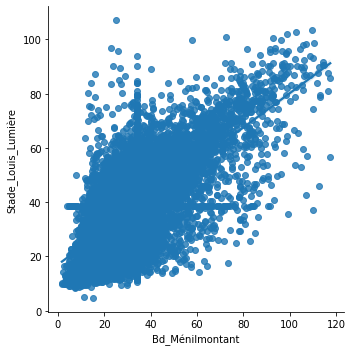

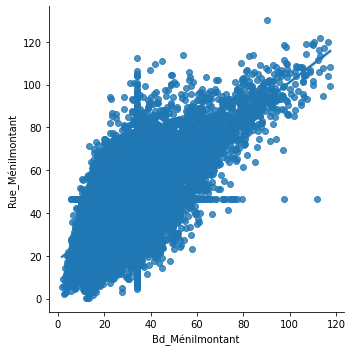

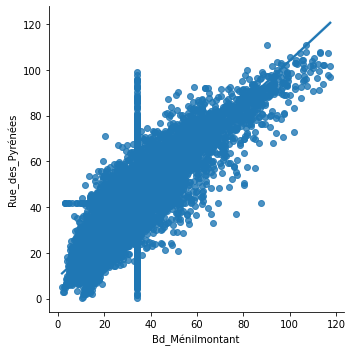

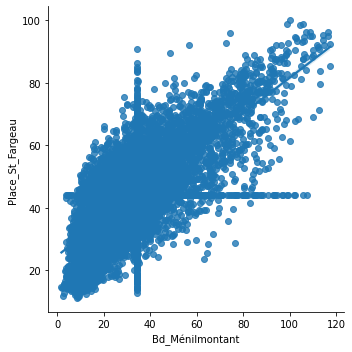

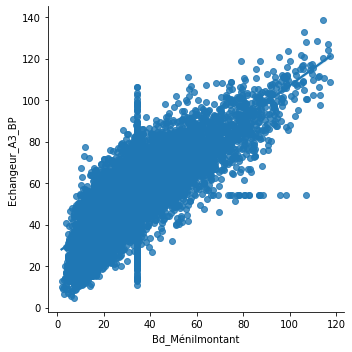

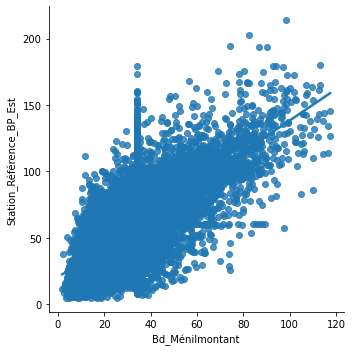

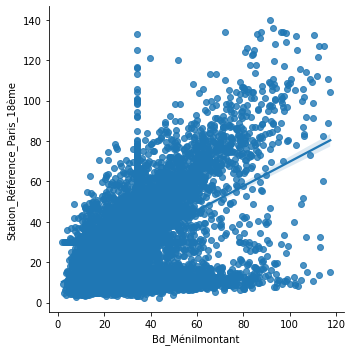

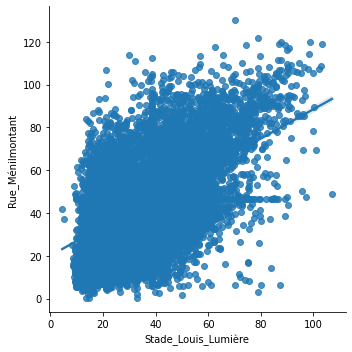

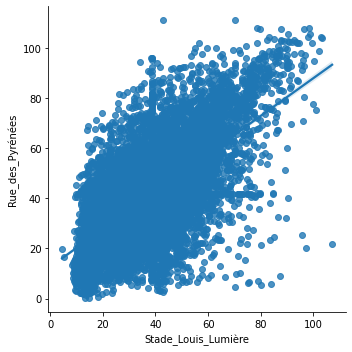

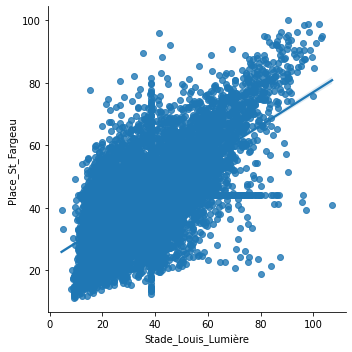

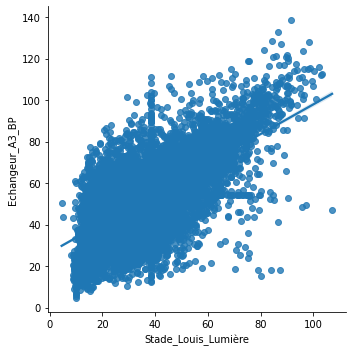

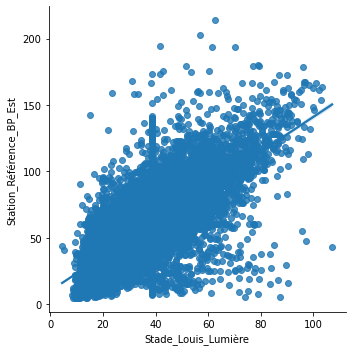

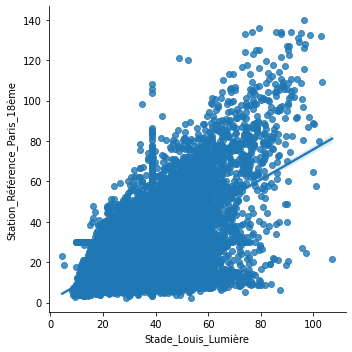

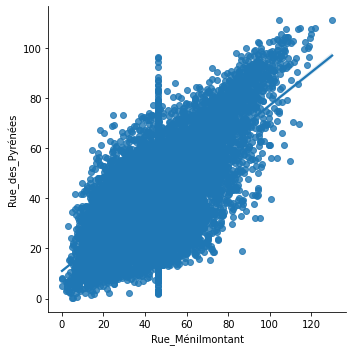

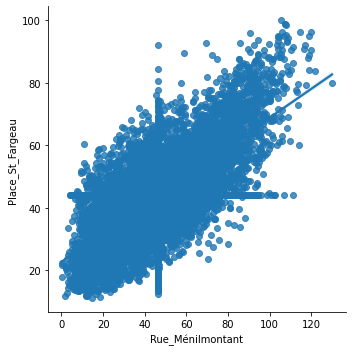

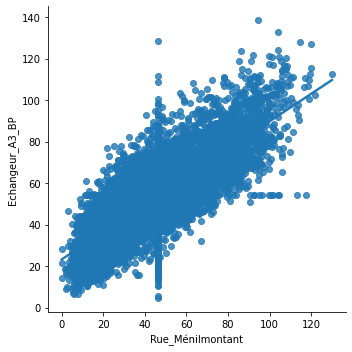

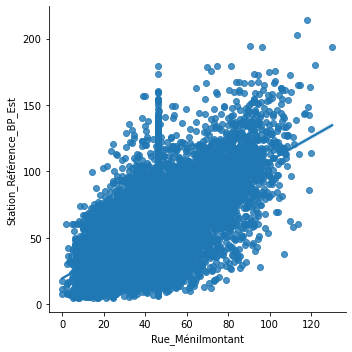

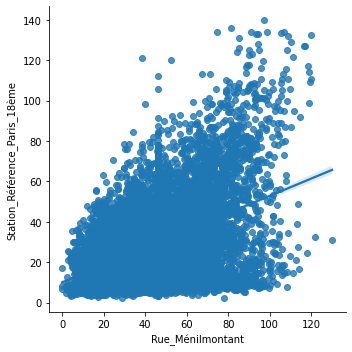

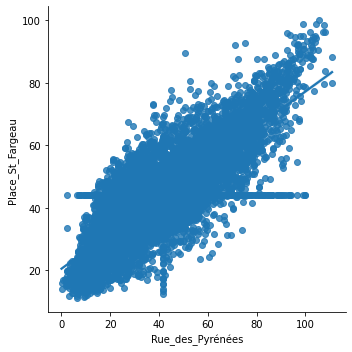

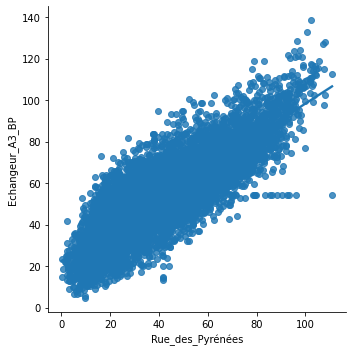

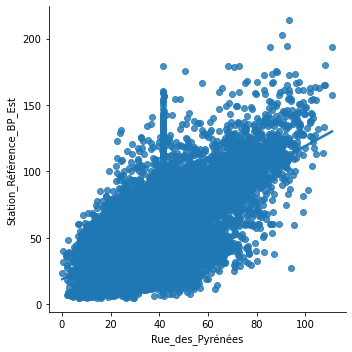

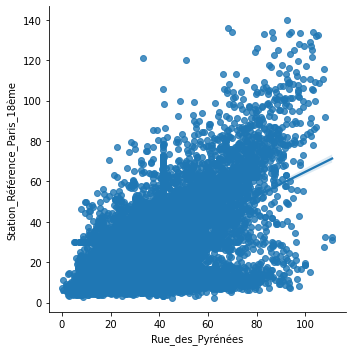

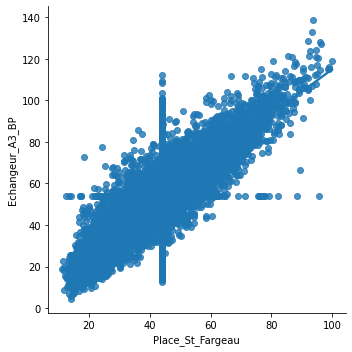

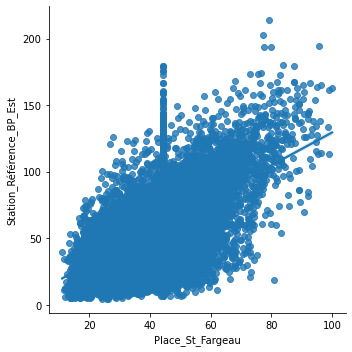

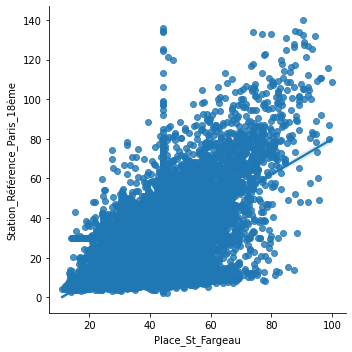

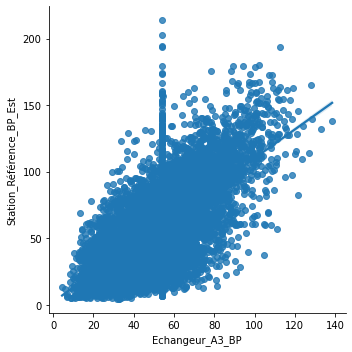

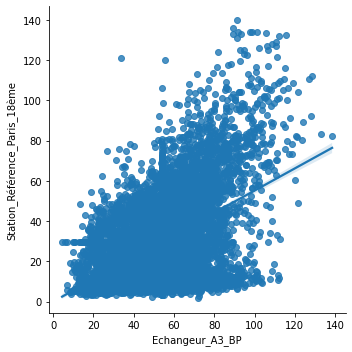

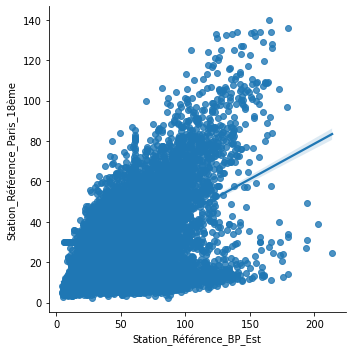

In [228]:
# Régression 

sns.lmplot(x="Pere_Lachaise", y="Parc_de_Belleville", data=data)
sns.lmplot(x="Pere_Lachaise", y="Bd_Ménilmontant", data=data)
sns.lmplot(x="Pere_Lachaise", y="Stade_Louis_Lumière", data=data)
sns.lmplot(x="Pere_Lachaise", y="Rue_Ménilmontant", data=data)
sns.lmplot(x="Pere_Lachaise", y="Rue_des_Pyrénées", data=data)
sns.lmplot(x="Pere_Lachaise", y="Place_St_Fargeau", data=data)
sns.lmplot(x="Pere_Lachaise", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Pere_Lachaise", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Pere_Lachaise", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Parc_de_Belleville", y="Bd_Ménilmontant", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Stade_Louis_Lumière", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Rue_Ménilmontant", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Rue_des_Pyrénées", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Place_St_Fargeau", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Parc_de_Belleville", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Bd_Ménilmontant", y="Stade_Louis_Lumière", data=data)
sns.lmplot(x="Bd_Ménilmontant", y="Rue_Ménilmontant", data=data)
sns.lmplot(x="Bd_Ménilmontant", y="Rue_des_Pyrénées", data=data)
sns.lmplot(x="Bd_Ménilmontant", y="Place_St_Fargeau", data=data)
sns.lmplot(x="Bd_Ménilmontant", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Bd_Ménilmontant", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Bd_Ménilmontant", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Stade_Louis_Lumière", y="Rue_Ménilmontant", data=data)
sns.lmplot(x="Stade_Louis_Lumière", y="Rue_des_Pyrénées", data=data)
sns.lmplot(x="Stade_Louis_Lumière", y="Place_St_Fargeau", data=data)
sns.lmplot(x="Stade_Louis_Lumière", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Stade_Louis_Lumière", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Stade_Louis_Lumière", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Rue_Ménilmontant", y="Rue_des_Pyrénées", data=data)
sns.lmplot(x="Rue_Ménilmontant", y="Place_St_Fargeau", data=data)
sns.lmplot(x="Rue_Ménilmontant", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Rue_Ménilmontant", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Rue_Ménilmontant", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Rue_des_Pyrénées", y="Place_St_Fargeau", data=data)
sns.lmplot(x="Rue_des_Pyrénées", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Rue_des_Pyrénées", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Rue_des_Pyrénées", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Place_St_Fargeau", y="Echangeur_A3_BP", data=data)
sns.lmplot(x="Place_St_Fargeau", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Place_St_Fargeau", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Echangeur_A3_BP", y="Station_Référence_BP_Est", data=data)
sns.lmplot(x="Echangeur_A3_BP", y="Station_Référence_Paris_18ème", data=data)

sns.lmplot(x="Station_Référence_BP_Est", y="Station_Référence_Paris_18ème", data=data)

In [229]:
data['Month']=data['date_et_heure_de_la_mesure'].str.slice(0, 7)

In [230]:
data['Month']

0       2019-01
1       2019-01
2       2019-01
3       2019-01
4       2019-01
         ...   
8755    2019-12
8756    2019-12
8757    2019-12
8758    2019-12
8759    2019-12
Name: Month, Length: 8760, dtype: object

In [231]:
data_month_mean=data.groupby(['Month']).mean().round(2)

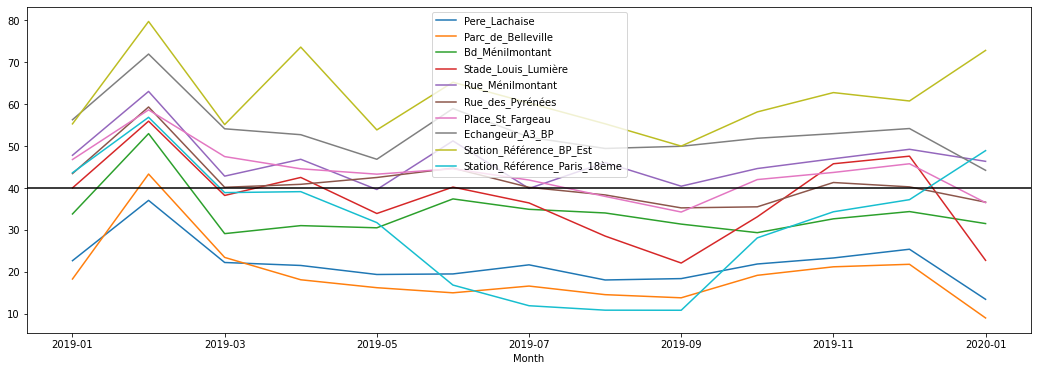

In [232]:
# Valeurs moyennes avec seuil à 40 µg/m3

data_month_mean.plot(figsize=(18,6))
plt.axhline(y=40, color='black')

In [233]:
data_month_max=data.groupby(['Month']).max().round(2)

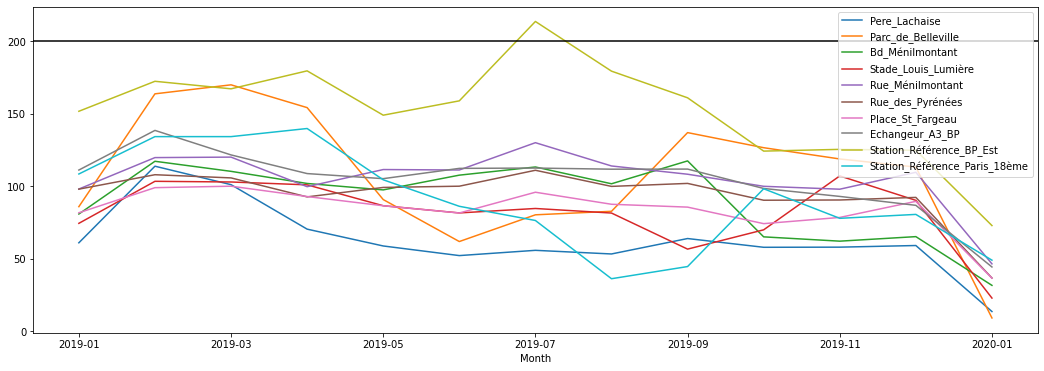

In [234]:
# Valeurs maximales avec seuil à 200 µg/m3

data_month_max.plot(figsize=(18,6))
plt.axhline(y=200, color='black')

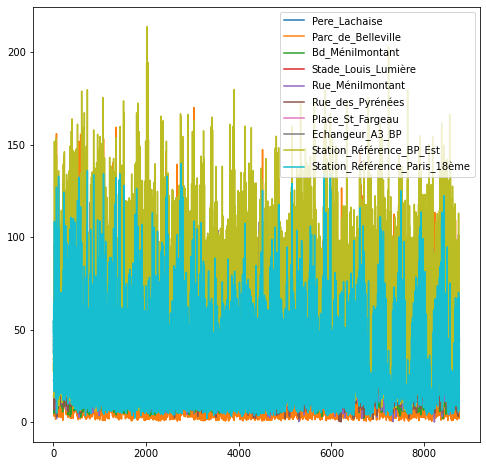

In [235]:
data.plot()